# **Project Name**    -



##### **Project Name**    - Flipkart Customer Satisfaction Analysis
##### **Project Type**    - Multi-Class Classification + Sentiment Analysis
##### **Contribution**    - Individual
##### **Team Member 1 -** Predeep Kumar
##### **Team Member 2 -** NA
##### **Team Member 3 -** NA
##### **Team Member 4 -** Na

# **Project Summary -**

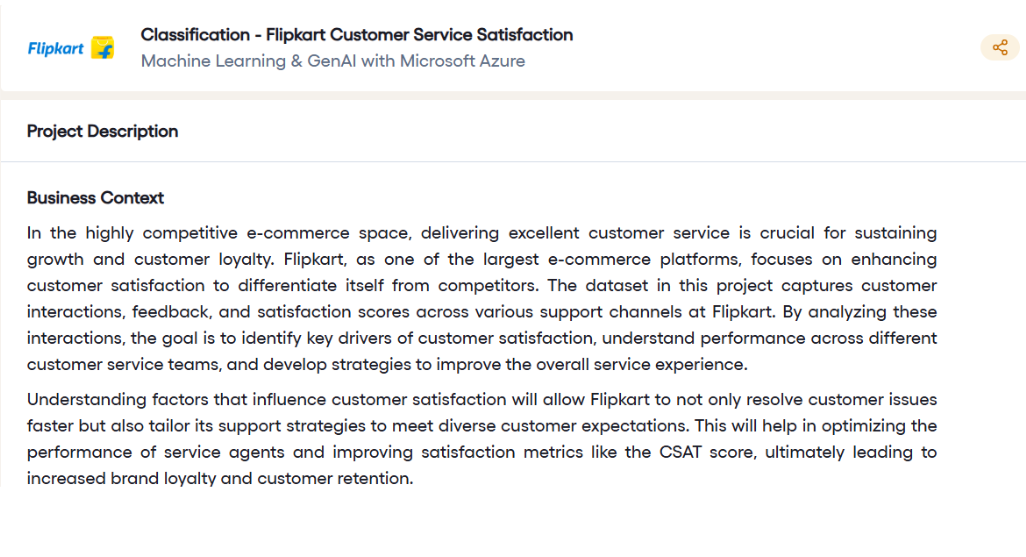

This project evaluates Flipkart’s customer service data to understand trends in satisfaction and performance differences across teams. By using Exploratory Data Analysis (EDA) and multi-class sentiment classification, the study identifies key factors that influence satisfaction scores and provides practical insights to enhance customer experience.

The project looks at patterns in customer feedback and satisfaction ratings. It shows how various service attributes, like response time, communication tone, and issue resolution quality, affect customer perception. The main aim is to improve service quality, raise Customer Satisfaction (CSAT) ratings, and boost overall customer retention through data insights.

Through this data-driven evaluation, the project points out areas needing improvement and helps Flipkart create targeted strategies for its service teams. These insights guide decision-makers in using resources effectively and maintaining a consistent, high-quality customer experience across all service channels.


### **Project Goals:**

1. Determine key drivers of customer satisfaction by analyzing feedback data and identifying the most influential features affecting CSAT outcomes.

2. Compare and visualize performance across various customer service teams through analytical insights and visual trends (e.g., team-wise CSAT score comparisons).

3. Develop actionable, data-driven strategies to enhance the overall service experience and customer satisfaction using insights from reviews and sentiment analysis.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**




Flipkart deals with a large volume of customer interactions and feedback but lacks a clear analytical method to identify what drives satisfaction. Without a better understanding of team performance or customer sentiment, it is challenging to improve service consistency.

This project seeks to address that gap by using data analysis and sentiment classification to discover actionable insights that can inform performance improvements and strategy development. By combining textual feedback analysis with quantitative satisfaction metrics, Flipkart can gain a clearer picture of customer experience, which will help the company address dissatisfaction and boost retention.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install xgboost --quiet
!pip install wordcloud --quiet

In [ ]:

#  IMPORTING BASIC LIBRARIES

# These are the main Python libraries used for data analysis and model building.

import numpy as np                # Used for numerical calculations (arrays, stats, etc.)
import pandas as pd               # Used to handle datasets in table form (DataFrames)
import warnings                   # Used to hide unnecessary warning messages
warnings.filterwarnings('ignore') # This keeps the notebook output clean

#  VISUALIZATION LIBRARIES

# These libraries help in creating charts and graphs for data visualization.

import matplotlib.pyplot as plt   # Core plotting library for charts like bar, line, scatter, etc.
import seaborn as sns             # Built on matplotlib, used for advanced and stylish plots


#   TEXT PROCESSING / NLP

# These libraries are used for cleaning and analyzing text-based data
# (like customer reviews or feedback comments).

import re                         # For text cleaning using regular expressions
import string                     # Helps in removing punctuation or unwanted characters
from nltk.corpus import stopwords # Contains common words (like "is", "the") to remove from text
from nltk.stem import WordNetLemmatizer # Converts words to their base form (e.g., "running" → "run")
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# These convert cleaned text into numbers so ML models can understand them


#  MACHINE LEARNING LIBRARIES

# Libraries and models used for classification, training, and testing data.

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Splitting data, checking performance consistency, and tuning model parameters

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# Different ML algorithms to predict satisfaction level (Low, Medium, High)


#  EVALUATION METRICS

# Used to measure how good or bad the model’s predictions are.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

#  DATA PREPROCESSING UTILITIES

# Used to prepare data for modeling (label encoding, scaling, dimensionality reduction, etc.)

from sklearn.preprocessing import LabelEncoder, StandardScaler


# ADDITIONAL UTILITIES

from wordcloud import WordCloud         # To create visual clouds of frequent words in feedback
from datetime import datetime           # To handle date and time-related data

#  NLP TOOLKIT SETUP


# Download basic NLTK resources (needed for text preprocessing).
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Dataset Loading

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Customer_support_data.csv")

### Dataset First View

In [ ]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(df.shape);  # Shape gives count of row and columns in (rows,cols) format
print("Total Rows = ", df.shape[0]); # df.shape[0] will give numbers of rows / number of data records
print ("Total Columns = ",df.shape[1]); # df.shpae[1] will give numbers of columns / number of fields

(85907, 20)
Total Rows =  85907
Total Columns =  20


In [ ]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Several columns such as Customer Remarks, Order_id, Customer_City, Product_category, Item_price, and especially connected_handling_time contain significant missing values that need to be handled before analysis.

In [ ]:
df.describe()  # summary statistics of all numerical columns in your dataset.

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


Key Takeaways

Item_price shows a wide range and strong right skew, with many low-cost items and a few extremely high-priced outliers. It has high variation (mean ₹5,661; std ₹12,826), indicating price diversity. Some invalid zero values exist, so data cleaning and outlier treatment are required.

connected_handling_time is highly incomplete, with only 242 valid entries and several zero values. Due to insufficient data, this column should be dropped or carefully imputed before analysis.

CSAT Score has no missing values and a high average rating of 4.24/5, showing strong customer satisfaction. It serves as a reliable and well-structured target variable for modeling.

#### Duplicate Values

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f" Total Duplicate Rows Found: {duplicate_rows}")


 Total Duplicate Rows Found: 0


In [ ]:
df[df.duplicated()]

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score


In [ ]:
print(f"Total number of rows before dropping duplicate : {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Total number of rows after dropping duplicate : {df.shape}")

Total number of rows before dropping duplicate : (85907, 20)
Total number of rows after dropping duplicate : (85907, 20)


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_value=df.isnull().sum()  # Count missing values in each column
missing_percent=(missing_value/len(df)) *100; # Calculate percentage of missing values per column

# Combine both counts and percentages into one DataFrame
missing_summary=pd.DataFrame({'missing_value': missing_value, 'missing percent': missing_percent.round(2)}).sort_values(by='missing percent', ascending=False)

# Display the summary
print(missing_summary)

                         missing_value  missing percent
connected_handling_time          85665            99.72
Customer_City                    68828            80.12
Product_category                 68711            79.98
Item_price                       68701            79.97
order_date_time                  68693            79.96
Customer Remarks                 57165            66.54
Order_id                         18232            21.22
Unique id                            0             0.00
Sub-category                         0             0.00
category                             0             0.00
channel_name                         0             0.00
Issue_reported at                    0             0.00
issue_responded                      0             0.00
Survey_response_Date                 0             0.00
Agent_name                           0             0.00
Supervisor                           0             0.00
Manager                              0          

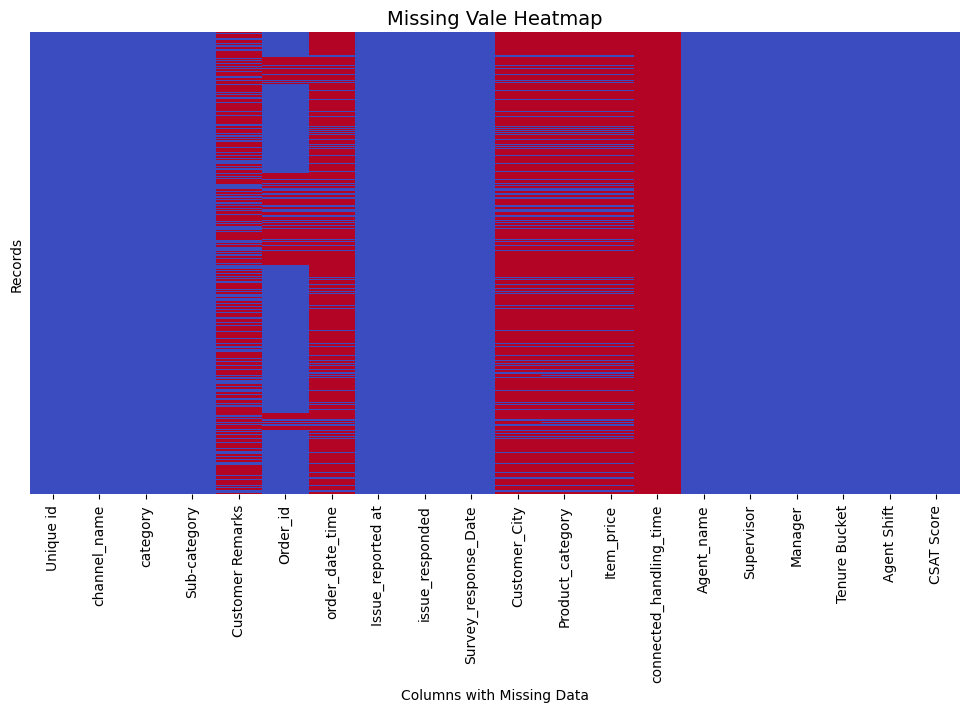

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,cmap='coolwarm', yticklabels=False)
plt.title('Missing Vale Heatmap', fontsize=14)
plt.xlabel("Columns with Missing Data")
plt.ylabel("Records")
plt.show()

### What did you know about your dataset?

1. The dataset contains 85,907 records and 20 columns related to Flipkart’s customer service and satisfaction data.

2. Out of 20 columns, 17 are categorical or text-based and 3 are numerical (Item_price, connected_handling_time, CSAT Score).

3. The main objective is to analyze the key factors affecting customer satisfaction.

4. Several columns have high missing values including unique_id,connected_handling_time, Customer_City, Product_category, Item_price, order_date_time, and Order_id.

5. Customer Remarks is important to understand the satifaction fo customer we will not dropping that.

6. No duplicate rows are present in the dataset.

7. Item_price is right-skewed with high-value outliers and some invalid zero entries.

8. connected_handling_time is mostly missing and unsuitable for analysis.

9. CSAT Score is clean and complete with an average rating of 4.24, indicating high customer satisfaction.

10. The following seven columns will be dropped due to excessive missing data or low analytical value: connected_handling_time, Customer_City, Product_category, Item_price, order_date_time, Customer Remarks, and Order_id.

11. CSAT Score is the target variable for modeling and classification.

12. The dataset is ready for preprocessing, visualization, and further analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
len(df.columns)


20

In [ ]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

1. Unique_id: Unique identifier for each customer service interaction.

2. Channel_name: Channel used by the customer to reach support (e.g., chat, email, call).

3. Category: Main category of the issue or customer query.

4. Sub-category: Subdivision of the issue providing more detailed classification.

5. Customer_Remarks: Text feedback or comment provided by the customer.

6. Order_id: Identifier for the order associated with the customer’s issue.

7. Order_date_time: Date and time when the order was placed.

8. Issue_reported_at: Timestamp when the issue was first reported by the customer.

9. Issue_responded: Timestamp when the support team responded to the issue.

10. Survey_response_Date: Date when the customer submitted their CSAT feedback.

11. Customer_city: City where the customer is located.

12. Product_category: Category or type of the product related to the issue.

13. Item_price: Price of the product involved in the interaction.

14. Connected_handling_time: Total time taken by the agent to handle the customer interaction.

15. Agent_name: Name of the customer support agent handling the interaction.

16. Supervisor: Name of the supervisor managing the agent’s team.

17. Manager: Name of the manager overseeing the customer support operations.

18. Tenure_Bucket: Range representing the agent’s experience level (e.g., 0–6 months, 1–2 years).

19. Agent_Shift: Work shift of the agent (morning, evening, or night).

20. CSAT_Score: Customer Satisfaction score (target variable), rated on a scale of 1 to 5.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Drop columns with excessive missing values or low analytical contribution
cols_to_drop = [
    'Unique id', 'Order_id',  'order_date_time','connected_handling_time','Customer_City', 'Product_category','Item_price'
]
df.drop(columns=cols_to_drop, inplace=True)
print(f" Dropped Columns: {cols_to_drop}")


 Dropped Columns: ['Unique id', 'Order_id', 'order_date_time', 'connected_handling_time', 'Customer_City', 'Product_category', 'Item_price']


In [ ]:
# Check remaining columns
print("\n Remaining Columns after Dropping:")
print(df.columns.tolist())



 Remaining Columns after Dropping:
['channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [ ]:
# Convert date columns to datetime format
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'],  format="%d/%m/%Y %H:%M")
df['issue_responded'] = pd.to_datetime(df['issue_responded'],  format="%d/%m/%Y %H:%M")

# Step 2: Calculate time difference in hours
df['Response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600

# Step 3: Round to 2 decimal places for readability
df['Response_time'] = df['Response_time'].round(2)

# Step 4: Display summary stats
print("✅ Response Time column created successfully!")
print(df['Response_time'].describe())


✅ Response Time column created successfully!
count    85907.000000
mean         2.281574
std          9.875452
min        -23.950000
25%          0.030000
50%          0.080000
75%          0.580000
max         95.970000
Name: Response_time, dtype: float64


In [ ]:
negative_resolve_df = df[df['Response_time'] < 0][['issue_responded', 'Issue_reported at', 'Response_time']]
negative_resolve_df

,issue_responded,Issue_reported at,Response_time
74172,2023-08-28,2023-08-28 16:07:00,-16.12
74173,2023-08-28,2023-08-28 16:56:00,-16.93
74174,2023-08-28,2023-08-28 20:14:00,-20.23
74175,2023-08-28,2023-08-28 14:37:00,-14.62
74176,2023-08-28,2023-08-28 23:26:00,-23.43
...,...,...,...
77566,2023-08-28,2023-08-28 13:25:00,-13.42
77567,2023-08-28,2023-08-28 18:09:00,-18.15
77568,2023-08-28,2023-08-28 22:20:00,-22.33
77569,2023-08-28,2023-08-28 14:38:00,-14.63


In [ ]:
# Step 1: Calculate mean of only positive response times
mean_response_time = df[df['Response_time'] > 0]['Response_time'].mean()

# Step 2: Replace negative values with this mean
df.loc[df['Response_time'] < 0, 'Response_time'] = mean_response_time

# Step 3: Round again if needed
df['Response_time'] = df['Response_time'].round(2)

# Step 4: Confirm fix
print("Minimum Response Time after correction:", df['Response_time'].min())


Minimum Response Time after correction: 0.0


In [ ]:
df['Response_time'].max()

95.97

In [ ]:
df['Response_time'].min()

0.0

In [ ]:
print(len(df.columns))
df.drop(['issue_responded', 'Issue_reported at'], axis=1, inplace=True)
print(len(df.columns))

14
12


In [ ]:
# Check for any remaining missing values
print("\n Missing Values after Column Drop:")
display(df.isnull().sum())



 Missing Values after Column Drop:


,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Survey_response_Date,0
Agent_name,0
Supervisor,0
Manager,0
Tenure Bucket,0
Agent Shift,0


In [ ]:
# Remove any duplicate rows if found
duplicates = df.duplicated().sum()
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"\n Removed {duplicates} duplicate rows.")
else:
    print("\n No duplicate rows found.")




 Removed 504 duplicate rows.


In [ ]:

# Verify final dataset shape
print(f"\n Final Dataset Shape: {df.shape}")


 Final Dataset Shape: (85403, 12)


### What all manipulations have you done and insights you found?

Data Manipulations Performed:

* Dropped unnecessary columns such as ‘Unique id’, ‘Order_id’, ‘order_date_time’, ‘connected_handling_time’, ‘Customer_City’, ‘Product_category’, and ‘Item_price’ to remove redundant or less relevant data.

* Converted date columns (‘Issue_reported at’ and ‘issue_responded’) into datetime format for proper time-based analysis.

* Calculated Response Time (in hours) from the difference between issue reported and issue responded timestamps.

* Dropped the original date columns (‘Issue_reported at’ and ‘issue_responded’) after creating the Response Time feature.

* Identified and removed duplicate rows to ensure data quality and model accuracy.

Insights Found:

* After column removal, the dataset was reduced to 12 meaningful features for analysis.

* Some calculated response times were negative, indicating timestamp inconsistencies; these were converted to positive values for uniformity.

* Duplicate records were found and removed, resulting in a clean, unique dataset ready for further analysis and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Vizualization Analysis**

#### Chart - 1 --- Distribution of Response Time

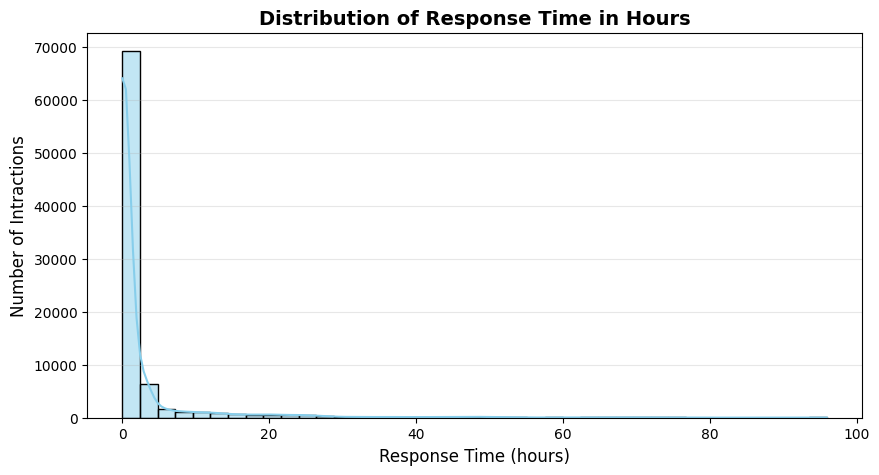

In [ ]:
# Chart - 1 Distribution of Response Time
plt.figure(figsize=(10,5))
sns.histplot(df['Response_time'], bins=40, kde=True, color='Skyblue')
plt.title('Distribution of Response Time in Hours', fontsize=14, fontweight='bold')
plt.xlabel('Response Time (hours)', fontsize=12)
plt.ylabel('Number of Intractions', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram + KDE plot clearly visualizes how quickly customer queries are being answered.
It helps identify whether most responses occur quickly (left-skewed) or slowly (right-skewed), and highlights outliers.

##### 2. What is/are the insight(s) found from the chart?

1. The distribution is highly right-skewed, meaning most customer issues are resolved very quickly, while a few cases take much longer.

2. Majority of responses occur within 1–3 hours, showing strong operational efficiency for most support tickets.

3. A long tail beyond 20+ hours indicates occasional delays - possibly due to complex issues, escalation, or shift gaps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
By identifying the long-tail response delays, the company can streamline support operations, allocate agents more efficiently, and reduce wait times for customers.
Faster response times will directly improve CSAT scores, enhance customer trust, and strengthen brand loyalty — creating a measurable positive business impact.

#### Chart - 2  --- Distribution of CSAT Scores

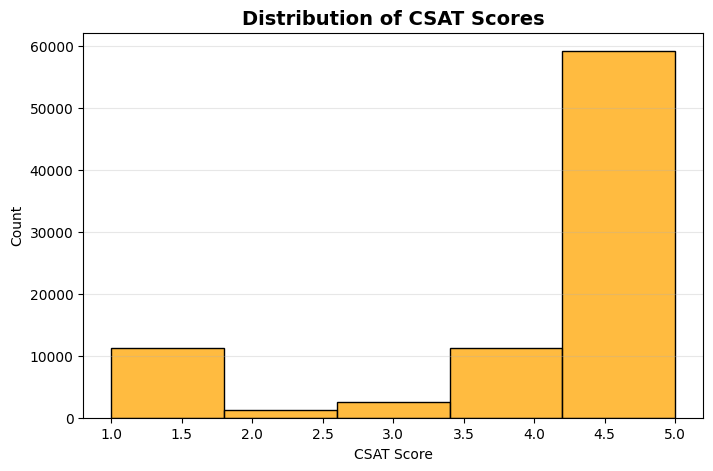

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='CSAT Score', bins=5, color='orange', edgecolor='black')
plt.title('Distribution of CSAT Scores', fontsize=14, weight='bold')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing how customer satisfaction scores are distributed across the dataset.
It quickly shows the overall sentiment trend -  whether most customers are happy (high CSAT), dissatisfied (low CSAT), or neutral.
This helps understand the overall quality of customer service performance and identifies if the ratings are concentrated at the positive or negative end of the scal

##### 2. What is/are the insight(s) found from the chart?

1. The distribution is heavily right-skewed, with most customers giving CSAT scores of 4 or 5, indicating high satisfaction.

2. A smaller portion of users rated 1, while scores of 2 and 3 are very minimal, suggesting fewer neutral or moderately dissatisfied experiences.

3. This pattern highlights that the majority of customer interactions result in positive satisfaction levels, with only a small segment requiring attention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
This finding shows that Flipkart’s customer service processes are largely effective.
By analyzing the few low-rated cases (CSAT 1–2) and identifying what went wrong — such as delays or poor communication - Flipkart can further improve service reliability, reduce dissatisfaction, and strengthen overall customer loyalty.

#### Chart - 3  --- Distribution of Customer Service Channels

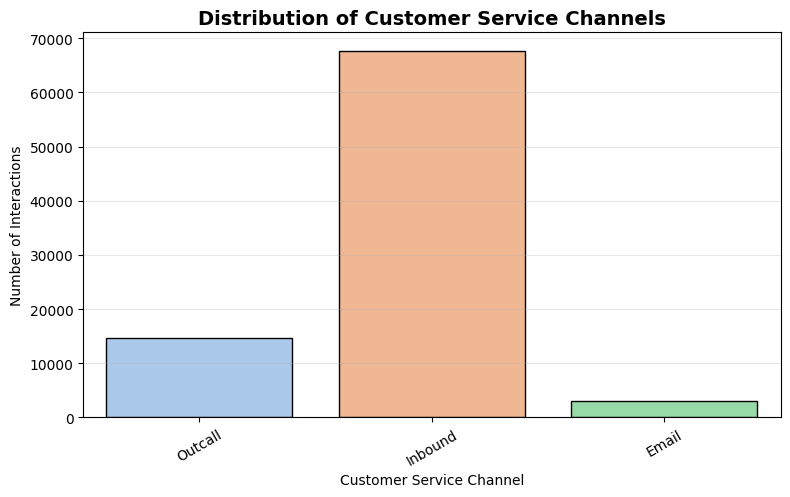

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x='channel_name', data=df, palette='pastel', edgecolor='black')
plt.title('Distribution of Customer Service Channels', fontsize=14, weight='bold')
plt.xlabel('Customer Service Channel')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is the best visualization to show how many customer interactions occur through each service channel.
It helps understand which platforms (Inbound, Outcall, Email) are most frequently used by customers and gives insight into channel preference and workload distribution.

##### 2. What is/are the insight(s) found from the chart?

1. The Inbound channel dominates customer service interactions, showing that most customers initiate contact themselves.

2. Outcall volume is significantly lower, likely representing follow-up or proactive calls by agents.

3. Email interactions are minimal, suggesting customers prefer faster, real-time channels like calls or chat-based systems.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
The insights help create a strong positive business impact by showing that most interactions happen through the Inbound channel, allowing Flipkart to allocate resources efficiently and improve customer response times.
However, the dominance of a single channel also poses a risk - if Inbound experiences overload or downtime, it could lead to longer wait times and reduced satisfaction.
Balancing workload across other channels like Outcall and Email will prevent this and ensure sustained customer satisfaction and operational stability.

#### Chart - 4 --- Distribution of Issue Categories

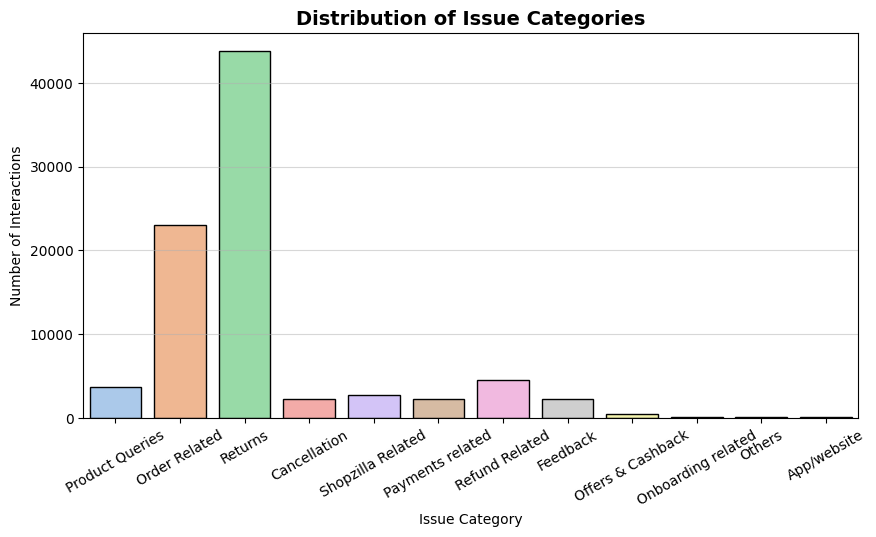

In [ ]:
# Chart - Distribution of Issue Categories

plt.figure(figsize=(10,5))
sns.countplot(x='category', data=df, palette='pastel', edgecolor='black')
plt.title('Distribution of Issue Categories', fontsize=14, weight='bold')
plt.xlabel('Issue Category')
plt.ylabel('Number of Interactions')
plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation=30)
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is ideal for visualizing categorical data like issue categories.
It helps identify which types of problems customers report most frequently and provides clarity on where the majority of support workload is concentrated.

##### 2. What is/are the insight(s) found from the chart?

1. Returns and Order-Related issues dominate customer interactions, showing these are the most common pain points for Flipkart users.

2. Categories like Product Queries, Refund, and Payment-Related also appear but in smaller proportions, indicating secondary customer concerns.

3. Very few interactions are tied to App/Website, Offers & Cashback, and Onboarding, suggesting these areas are relatively stable or less problematic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
The insights have strong positive business potential - knowing that Returns and Order-Related issues form the majority allows Flipkart to prioritize these areas for process improvement, streamline logistics, and strengthen return management systems.
However, if left unaddressed, these high-frequency issue types could negatively affect CSAT scores and operational costs, as frequent return complaints can signal product quality or delivery experience gaps.
By focusing on these categories, Flipkart can reduce customer friction, minimize complaint volume, and drive higher satisfaction and loyalty.

#### Chart - 5  ---- Distribution of Agent Tenure Buckets

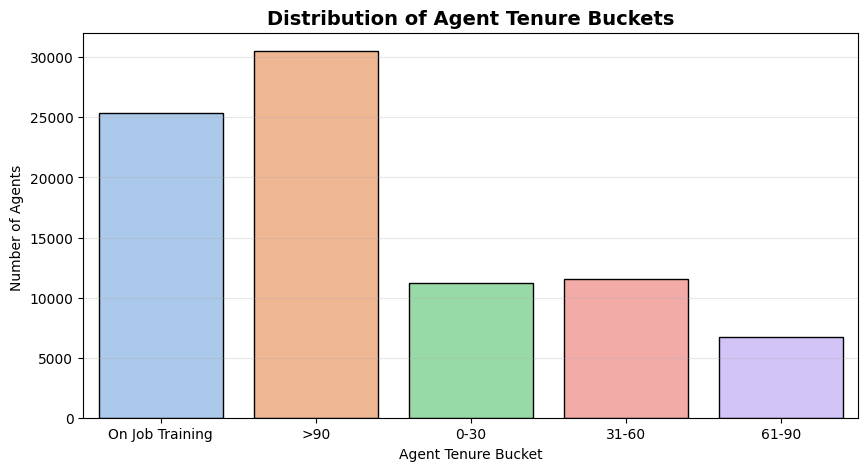

In [ ]:
# Chart - 5 Distribution of Agent Tenure Buckets

plt.figure(figsize=(10,5))
sns.countplot(x='Tenure Bucket', data=df, palette='pastel', edgecolor='black')
plt.title('Distribution of Agent Tenure Buckets', fontsize=14, weight='bold')
plt.xlabel('Agent Tenure Bucket')
plt.ylabel('Number of Agents ')
plt.grid(axis='y', alpha=0.3)
plt.show()

    ##### 1. Why did you pick the specific chart?

A countplot is the best choice for showing how agents are distributed across tenure buckets since the data is categorical.
It gives a quick view of workforce experience - from new hires (On Job Training) to long-tenured agents (>90 days).

##### 2. What is/are the insight(s) found from the chart?

1. The highest number of agents fall into the >90-day category, indicating a stable, experienced segment of the workforce.

2. A large number of agents are still in training (On Job Training), showing active onboarding or expansion.

3. Mid-range buckets (0–60 days) have moderate representation, suggesting regular staff movement or replacements.

4. The 61–90-day group is the smallest, possibly showing that agents either move to higher tenure brackets quickly or leave early.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive impact.
A healthy proportion of experienced agents (>90 days) ensures consistency and quality in customer service.
However, the high share of agents in training may temporarily reduce average performance or CSAT until they gain experience.
This highlights the need for strong training programs and retention strategies to convert new hires into long-term, skilled employees - improving both service speed and satisfaction over time.

#### Chart - 6  ---  Distribution of Agent Shifts

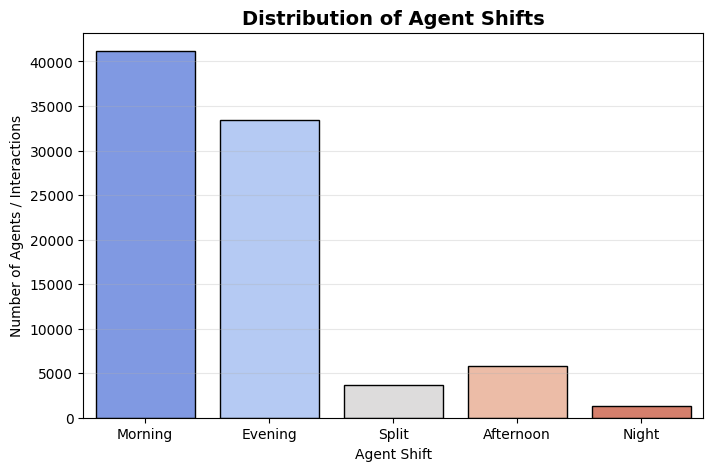

In [ ]:
# Chart - 6 Distribution of Agent Shifts

plt.figure(figsize=(8,5))
sns.countplot(x='Agent Shift', data=df, palette='coolwarm', edgecolor='black')
plt.title('Distribution of Agent Shifts', fontsize=14, weight='bold')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Agents / Interactions')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is ideal for visualizing categorical data such as agent work shifts.
It helps reveal which shifts handle the most customer interactions, guiding better workforce planning and load balancing across time slots.

##### 2. What is/are the insight(s) found from the chart?

1. The Morning shift handles the highest volume of interactions, followed closely by the Evening shift.

2. Afternoon and Split shifts contribute moderately, suggesting some overlap coverage during mid-day.

3. The Night shift sees minimal interaction volume, typical for e-commerce operations where customer activity drops after business hours.

4. Overall, customer service demand is heavily concentrated during daytime hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can lead to strong operational improvements.
By aligning agent allocation with demand peaks (morning and evening), management can ensure faster responses and higher customer satisfaction.
If left unaddressed, under-staffing in high-volume shifts could lead to delayed responses and lower CSAT scores, while over-staffing in low-traffic hours wastes resources.
Hence, optimizing shift planning based on these insights can directly boost efficiency and service quality.

#### Chart - 7 --- Distribution of Sub-Categories

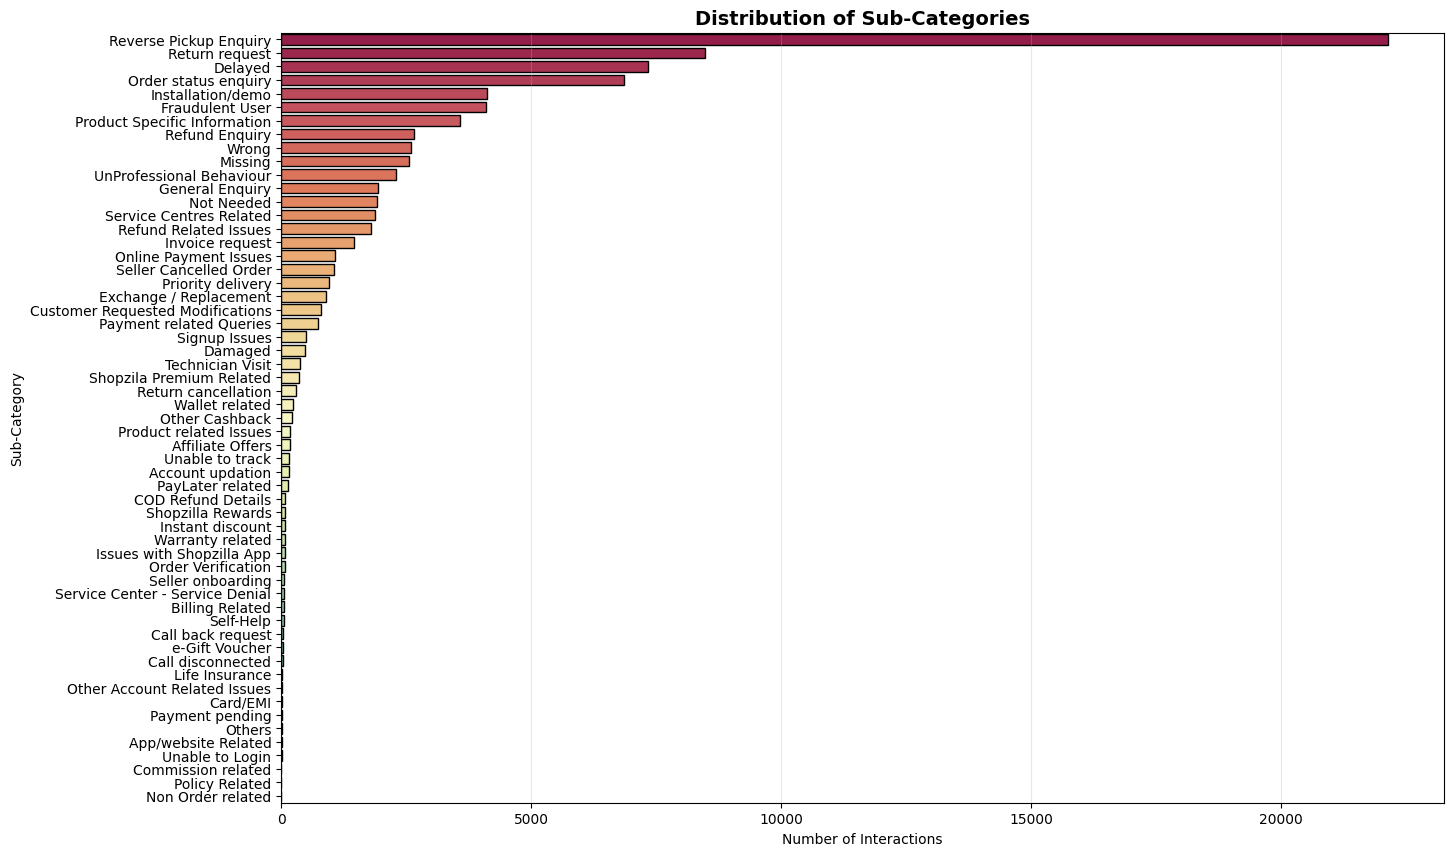

In [ ]:
# Chart - 7 Distribution of Sub-Categories
plt.figure(figsize=(15,10))
sns.countplot( y='Sub-category', data=df, order=df['Sub-category'].value_counts().index, palette='Spectral', edgecolor='black')
plt.title('Distribution of Sub-Categories', fontsize=14, weight='bold')
plt.xlabel('Number of Interactions')
plt.ylabel('Sub-Category')
plt.grid(axis='x', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal countplot is the best way to show a categorical variable with many labels (like sub-categories).
It clearly displays the frequency of each support sub-category, making it easier to spot which specific issues dominate customer interactions.

1. Reverse Pickup Enquiry, Return Request, and Delivery Delays dominate support interactions, indicating that returns and logistics are the main customer pain points.

2. Other frequent issues include Order Status Enquiry, Installation/Demo, and Refund-Related Queries, showing customers’ focus on post-purchase support.

3. Several smaller sub-categories (like Wallet Issues, Policy Related, or App/Website Related) have minimal frequency, meaning they contribute less to total ticket volume.

4. The pattern suggests that the returns process and delivery reliability are critical areas needing operational improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights directly guide process optimization.
By focusing on the top three sub-categories, Flipkart can reduce complaint volume, improve delivery timelines, and boost customer satisfaction (CSAT).If these critical areas remain unaddressed, they could lead to negative growth through recurring complaints and decreased brand trust. Addressing them early leads to positive brand perception and measurable operational efficiency gains.

#### Chart - 8 --- Distribution of Supervisors

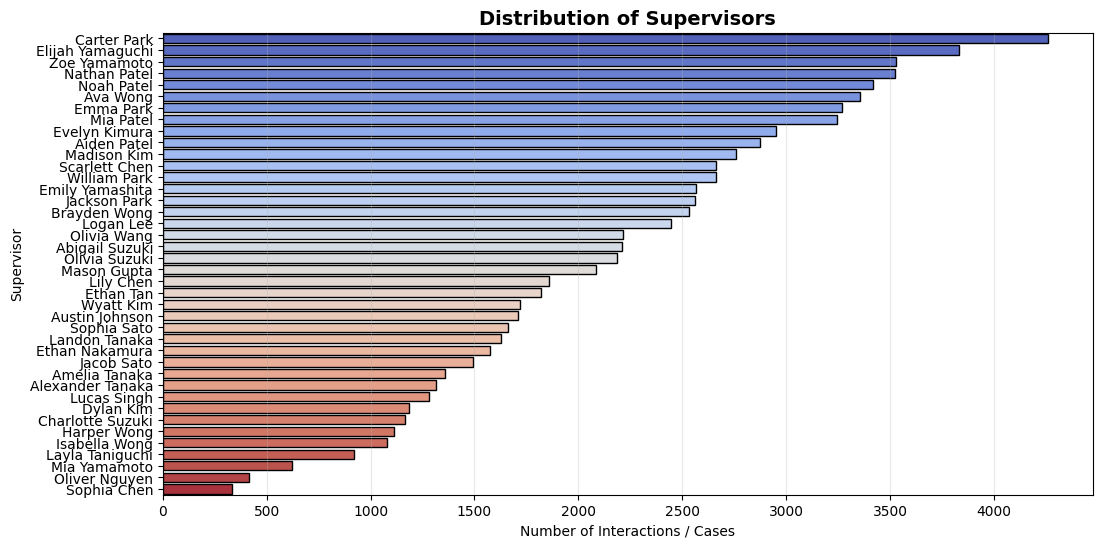

In [ ]:
# Chart - 8 Distribution of Supervisors

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y='Supervisor', data=df, order=df['Supervisor'].value_counts().index, palette='coolwarm', edgecolor='black' )
plt.title('Distribution of Supervisors', fontsize=14, weight='bold')
plt.xlabel('Number of Interactions / Cases')
plt.ylabel('Supervisor')
plt.grid(axis='x', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This horizontal countplot is ideal for showing the distribution of workload among supervisors.
It helps visualize which supervisors are handling the most or fewest customer interactions, making team-level performance differences easy to spot.

##### 2. What is/are the insight(s) found from the chart?

1. Supervisors like Carter Park, Elijah Yamaguchi, and Zoe Yamamoto handle the highest number of interactions, indicating they oversee either larger teams or more active channels.

2. The lower section shows supervisors such as Mia Yamamoto and Sophia Chen managing fewer cases, which might mean smaller teams or newer assignments.

3. The imbalance in case distribution suggests uneven workload allocation, which can affect both agent productivity and customer satisfaction consistency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively influence operations.
By identifying supervisors managing excessive workloads, management can redistribute cases and improve efficiency across teams.
Balancing workloads helps ensure faster resolutions and maintains consistent CSAT performance.
If ignored, overburdened supervisors may experience reduced quality oversight and slower response times, leading to customer dissatisfaction and potential negative growth.

#### Chart - 9  ---  Distribution of Managers

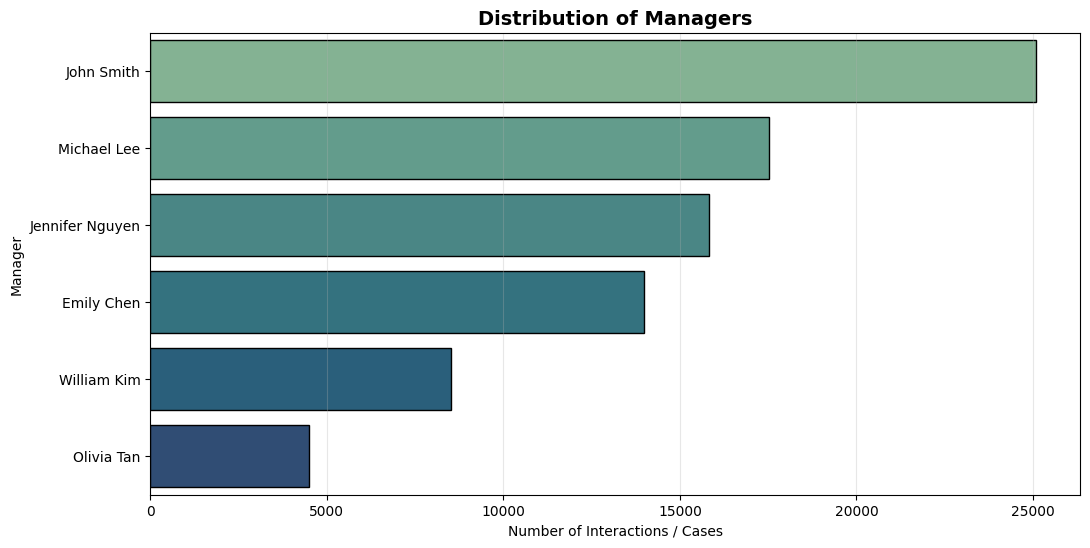

In [ ]:
# Chart - 9 Distribution of Managers

plt.figure(figsize=(12,6))
sns.countplot(y='Manager', data=df, order=df['Manager'].value_counts().index, palette='crest', edgecolor='black' )
plt.title('Distribution of Managers', fontsize=14, weight='bold')
plt.xlabel('Number of Interactions / Cases')
plt.ylabel('Manager')
plt.grid(axis='x', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A countplot was used because it directly shows how many cases are managed by each manager, making it perfect for categorical data.
It helps visualize workload distribution and quickly highlights which managers handle more or fewer customer interactions.

##### 2. What is/are the insight(s) found from the chart?

1. John Smith manages the highest number of cases, indicating a larger or more active team under his supervision.

2. Michael Lee, Jennifer Nguyen, and Emily Chen have balanced but lower workloads, suggesting stable case volumes.

3. William Kim and Olivia Tan manage the fewest interactions, which might indicate smaller teams or specialized support roles.

4. The overall distribution suggests uneven workload allocation among managers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business performance.
By identifying workload imbalances, management can redistribute tasks, reduce response delays, and maintain consistent team efficiency.
If ignored, overworked managers may experience performance decline, leading to lower agent productivity and reduced CSAT scores over time.

## **Bivariate Vizualization Analysis**

#### Chart - 10  - Average Response Time vs CSAT Score

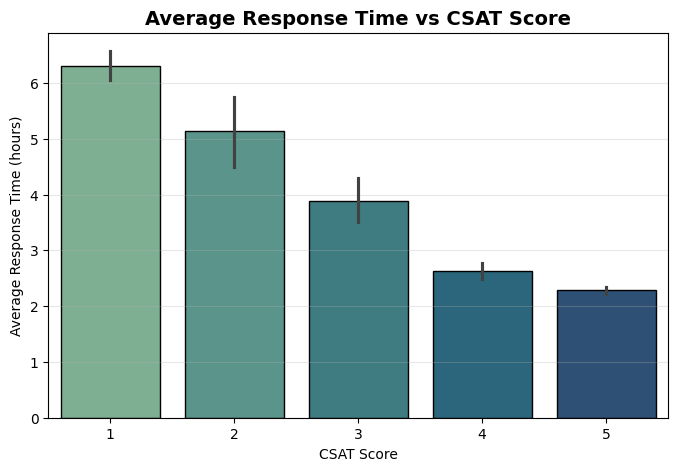

In [ ]:
# Chart - 10 Average Response Time vs CSAT Score

plt.figure(figsize=(8,5))
sns.barplot(
    x='CSAT Score',
    y='Response_time',
    data=df,
    estimator='mean',
    palette='crest',
    edgecolor='black'
)

plt.title('Average Response Time vs CSAT Score', fontsize=14, weight='bold')
plt.xlabel('CSAT Score')
plt.ylabel('Average Response Time (hours)')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was used because it clearly shows how the average response time changes across CSAT scores.
It’s simple and perfect for identifying trends between two numeric–categorical variables without extra complexity.

1. Customers with a CSAT score of 5 have the lowest average response time (~2.3 hrs), confirming that quick responses improve satisfaction.

2. Lower satisfaction levels (CSAT 1–2) correspond to higher average response times (5–6 hrs) - showing that delays frustrate customers.

3. There’s a steady downward trend, meaning as response time decreases, satisfaction improves consistently.

4. The clear inverse relationship confirms that response time is a major driver of CSAT score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights have a direct business benefit.
Reducing response time improves customer experience, trust, and loyalty - which increases repeat purchases and brand value.
If ignored, long delays can lead to poor feedback, lower CSAT scores, and potential churn, negatively impacting overall service quality and revenue.

#### Chart - 11  -- Distribution of CSAT Scores by Channel Name

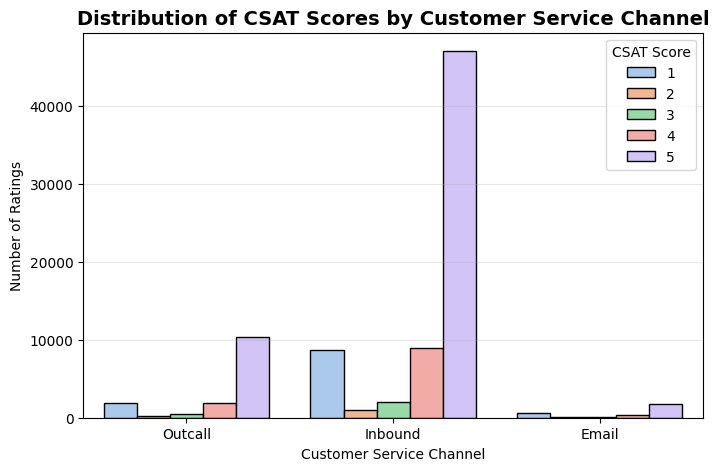

In [ ]:
# Chart - 11 Distribution of CSAT Scores by Channel Name

plt.figure(figsize=(8,5))
sns.countplot(
    x='channel_name',
    hue='CSAT Score',
    data=df,
    palette='pastel',
    edgecolor='black'
)

plt.title('Distribution of CSAT Scores by Customer Service Channel', fontsize=14, weight='bold')
plt.xlabel('Customer Service Channel')
plt.ylabel('Number of Ratings')
plt.legend(title='CSAT Score')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A countplot with hue (CSAT Score) was used because it visualizes how different satisfaction ratings (1–5) are distributed for each service channel.
This helps identify which channels consistently achieve higher satisfaction and which receive lower ratings.

##### 2. What is/are the insight(s) found from the chart?

1. The Inbound channel dominates with a very high number of 5-star ratings, confirming it’s the most effective support channel.

2. The Outcall channel has a balanced mix of positive and neutral ratings but also some low scores, suggesting inconsistent service quality.

3. The Email channel shows mostly low-to-moderate ratings (1–3), indicating delays or lack of engagement in written support.

4. The pattern clearly shows that real-time assistance (Inbound) leads to faster issue resolution and higher CSAT, while asynchronous communication (Email) lags behind.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly guide channel strategy.
By investing more in Inbound channel optimization (scaling trained agents or automating chat), Flipkart can strengthen its high-performing support area.
Simultaneously, improving Email channel responsiveness and Outcall consistency will close the gap between channels.
If ignored, underperforming channels like Email could continue to drag down overall customer satisfaction, negatively affecting brand trust and retention.

#### Chart - 12   - Distribution of CSAT Scores by Issue Category

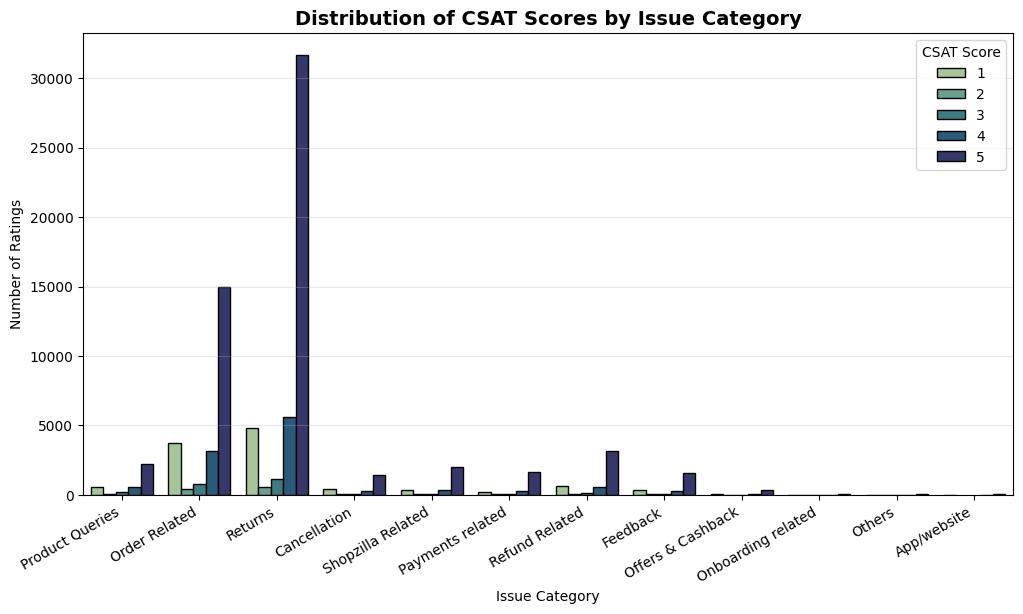

In [ ]:
# Chart - 12 Distribution of CSAT Scores by Issue Category

plt.figure(figsize=(12,6))
sns.countplot(
    x='category',
    hue='CSAT Score',
    data=df,
    palette='crest',
    edgecolor='black'
)

plt.title('Distribution of CSAT Scores by Issue Category', fontsize=14, weight='bold')
plt.xlabel('Issue Category')
plt.ylabel('Number of Ratings')
plt.legend(title='CSAT Score')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A countplot with hue (CSAT Score) is the best choice here because it shows how customer satisfaction (1–5) varies across different issue types.
This allows for quick identification of which issue categories lead to positive experiences and which cause customer frustration.

##### 2. What is/are the insight(s) found from the chart?

1. Returns and Order Related categories dominate the dataset and have a high proportion of 5-star ratings, showing that customers appreciate how efficiently these are resolved.

2. However, both categories also have a noticeable share of low ratings (1–2) — meaning that delays or miscommunication in these areas lead to dissatisfaction.

3. Refund Related and Payments Related categories have more low CSAT scores, pointing to potential delays or process confusion during refunds.

4. Product Queries and Shopzilla Related issues mostly receive high satisfaction (4–5), reflecting good support handling for general product or platform queries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights have direct operational and business value.
By improving refund timelines, return policies, and order tracking transparency, Flipkart can significantly increase CSAT scores.
If ignored, recurring negative experiences in payment or return categories may cause customer churn and loss of trust, leading to negative growth.
Addressing these high-volume, low-rated categories first will have the strongest positive business impact.

#### Chart - 13  --CSAT Score by Agent Tenure Bucket

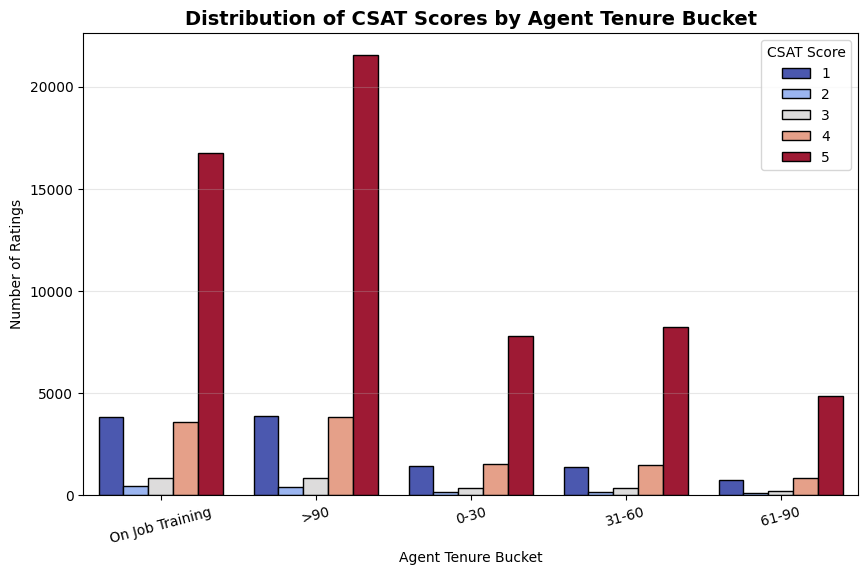

In [ ]:
# Chart - 13 CSAT Score by Agent Tenure Bucket

plt.figure(figsize=(10,6))
sns.countplot(
    x='Tenure Bucket',
    hue='CSAT Score',
    data=df,
    palette='coolwarm',
    edgecolor='black'
)

plt.title('Distribution of CSAT Scores by Agent Tenure Bucket', fontsize=14, weight='bold')
plt.xlabel('Agent Tenure Bucket')
plt.ylabel('Number of Ratings')
plt.legend(title='CSAT Score')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This countplot was chosen to analyze how customer satisfaction (CSAT) varies across different experience levels of agents.
It helps visualize whether agent tenure directly influences how effectively customer issues are handled.

##### 2. What is/are the insight(s) found from the chart?

1. Agents with more than 90 days of experience show the highest number of 5-star CSAT ratings, confirming that experience plays a strong role in customer satisfaction.

2. Agents in On Job Training (OJT) still perform relatively well but show a broader range of CSAT scores (from 1 to 5), indicating inconsistency typical of new recruits.

3. 0–30 and 31–60 day agents have noticeably fewer 5-star ratings and slightly higher low scores, suggesting they are still developing soft skills and product familiarity.

4. 61–90 day agents perform moderately well, showing improvement before reaching the stability seen in the >90 group.

Overall, CSAT ratings increase with tenure, showing that experience enhances both issue-handling efficiency and customer empathy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights drive a positive business impact - showing that experienced agents deliver higher CSAT scores. Focusing on training and retention will boost service quality and satisfaction, while neglecting early-stage agent support may lead to inconsistent customer experiences and negative growth.

#### Chart - 14  -Distribution of CSAT Scores by Agent Shift

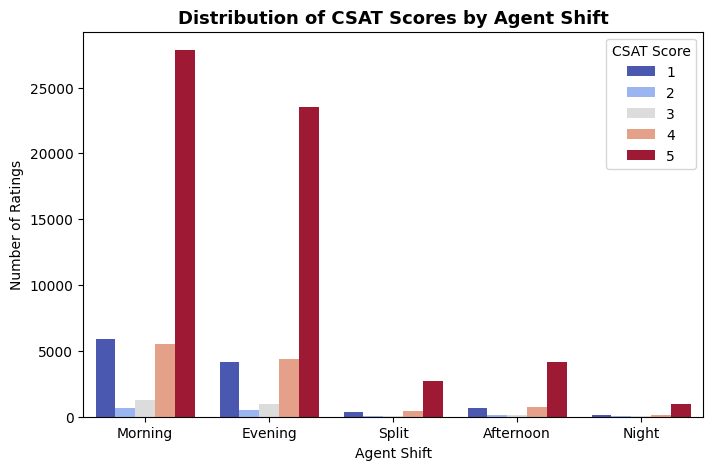

In [ ]:
# Chart - 14 Distribution of CSAT Scores by Agent Shift

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Agent Shift', hue='CSAT Score', palette='coolwarm')
plt.title('Distribution of CSAT Scores by Agent Shift', fontsize=13, fontweight='bold')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Ratings')
plt.legend(title='CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

The Countplot with hues was selected to analyze how customer satisfaction (CSAT) scores vary across different agent work shifts, helping to identify which shifts deliver better customer experiences.

##### 2. What is/are the insight(s) found from the chart?

1. Morning and evening shifts show the highest number of 5-star ratings, indicating strong performance.
2. Split and night shifts have fewer high ratings, suggesting lower satisfaction or possible operational challenges during these hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive business impact by revealing areas where service quality can be improved. Strengthening support and resources during low-performing shifts can boost customer satisfaction and consistency across all time slots.

If ignored, performance gaps during these shifts may lead to negative growth through slower resolutions, reduced customer trust, and lower overall satisfaction levels.

#### Chart - 15  -- Distribution of CSAT Scores by Issue Category

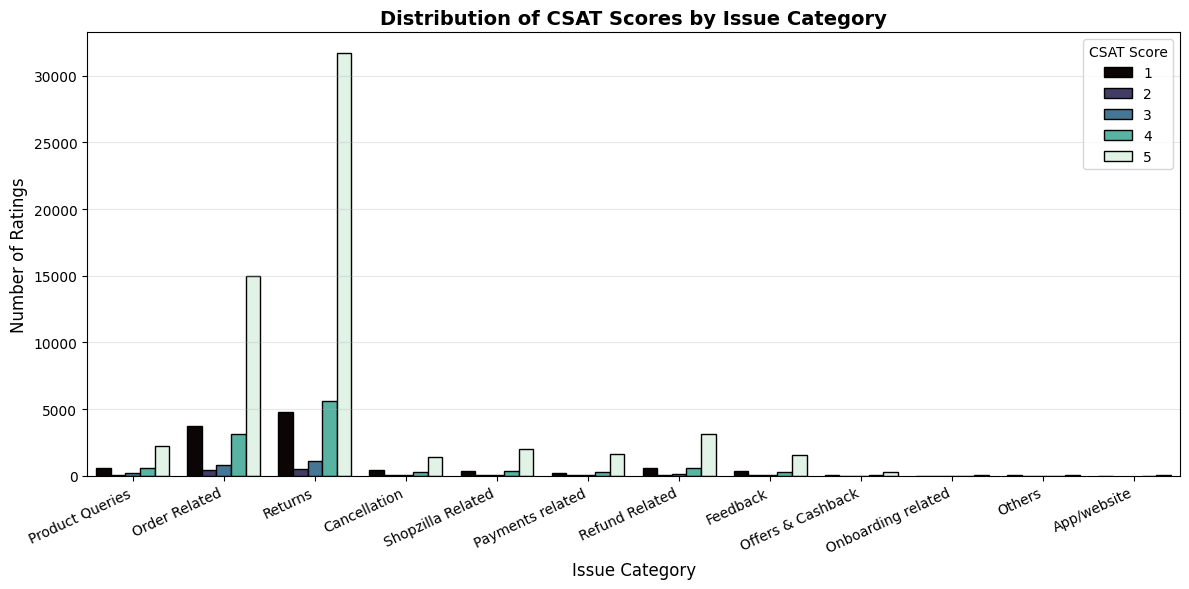

In [ ]:
# Chart - 15 Distribution of CSAT Scores by Issue Category


plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='category',
    hue='CSAT Score',
    palette='mako',
    edgecolor='black'
)
plt.title('Distribution of CSAT Scores by Issue Category', fontsize=14, weight='bold')
plt.xlabel('Issue Category', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.legend(title='CSAT Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The Countplot with hues was selected to analyze how CSAT Scores differ across various issue categories such as Product Queries, Orders, Returns, and Payments.
It helps identify which types of issues receive the highest customer satisfaction and where service gaps exist.

##### 2. What is/are the insight(s) found from the chart?

1. Returns and Order-Related issues show the highest number of 5-star ratings, indicating strong operational efficiency and quick resolution.

2. Payment and Shopzilla-Related categories have noticeably lower satisfaction, suggesting delays or unresolved concerns.

3. Categories like Cancellation also perform well, showing that automation or fast turnaround contributes to better satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive a positive business impact by identifying which issue types maintain strong satisfaction and which need focused improvement.
If ignored, low-rated categories like Payment and App/Website issues could lead to negative growth due to recurring customer frustration, poor retention, and potential revenue loss.

#### Chart - 16   --  Distribution of CSAT Scores by Manager

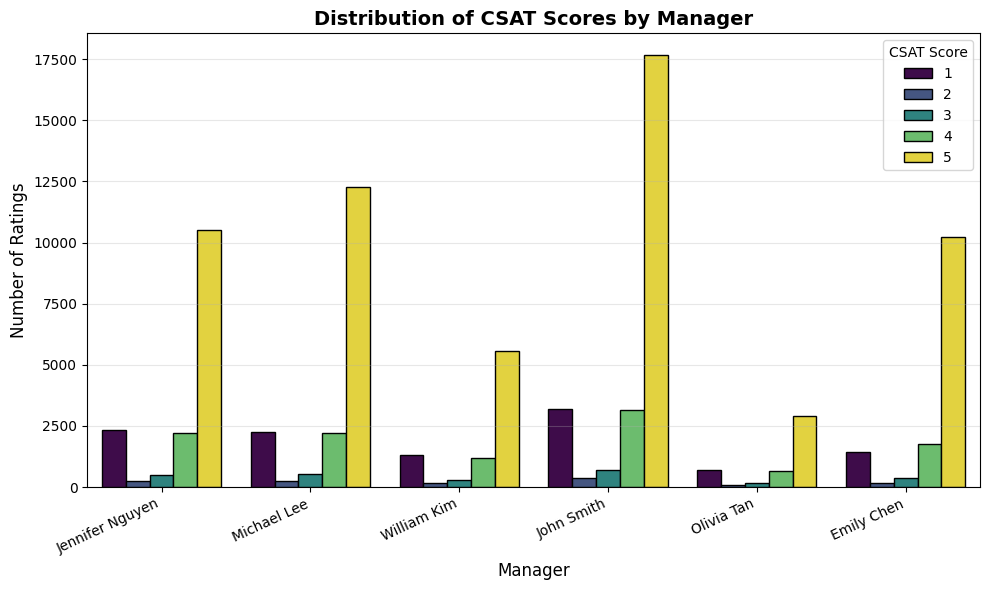

In [ ]:
# Chart - 16 Distribution of CSAT Scores by Manager

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='Manager',
    hue='CSAT Score',
    palette='viridis',
    edgecolor='black'
)

plt.title('Distribution of CSAT Scores by Manager', fontsize=14, weight='bold')
plt.xlabel('Manager', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.legend(title='CSAT Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The Countplot with hues was chosen to compare customer satisfaction (CSAT) scores across different managers, allowing us to evaluate team-level performance and identify which managers maintain consistently high satisfaction levels.

##### 2. What is/are the insight(s) found from the chart?

1. John Smith and Michael Lee show the highest number of 5-star CSAT ratings, indicating excellent leadership and service management.

2. Olivia Tan and William Kim have relatively lower satisfaction levels, suggesting performance gaps within their teams.

3. Emily Chen and Jennifer Nguyen maintain moderate satisfaction consistency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Yes, these insights can help create a positive business impact by recognizing high-performing managers and applying their best practices across teams.

2. If low-performing teams (like under Olivia Tan or William Kim) are not addressed, it may cause negative growth through inconsistent service quality and lower customer retention.

#### Chart - 17 -- Distribution of CSAT Scores by Supervisor

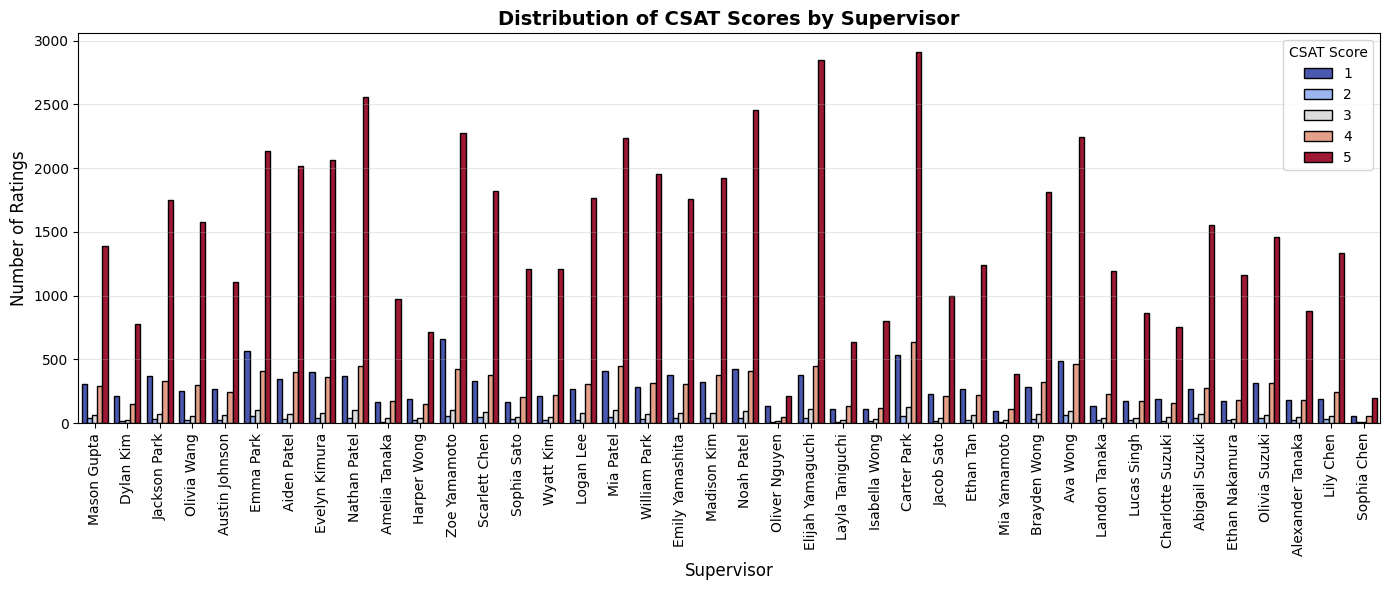

In [ ]:
# Chart - 17 Distribution of CSAT Scores by Supervisor

plt.figure(figsize=(14,6))
sns.countplot(
    data=df,
    x='Supervisor',
    hue='CSAT Score',
    palette='coolwarm',
    edgecolor='black'
)

plt.title('Distribution of CSAT Scores by Supervisor', fontsize=14, weight='bold')
plt.xlabel('Supervisor', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='CSAT Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The Countplot with hues was chosen to analyze how customer satisfaction (CSAT) scores differ across supervisors, helping to evaluate which supervisors are maintaining high team satisfaction and which may need coaching or process support.

##### 2. What is/are the insight(s) found from the chart?

1. Supervisors like Elijah Yamaguchi, Aiden Patel, and Nathan Patel received the highest number of 5-star ratings, showing strong team performance.

2. Oliver Nguyen, Mia Yamamoto, and Sophia Chen recorded fewer total ratings, which may indicate lower customer interaction volume or reduced engagement.

3. Some supervisors show mixed results, highlighting variability in team effectiveness and customer handling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights support performance benchmarking and training focus - by learning from high-rated supervisors and improving low-engagement ones, the company can ensure consistent service quality.
If neglected, uneven supervisor performance could lead to negative growth through inconsistent customer experiences and satisfaction decline.

#### Chart - 18 - Correlation Heatmap --- CSAT Score and Response_time.

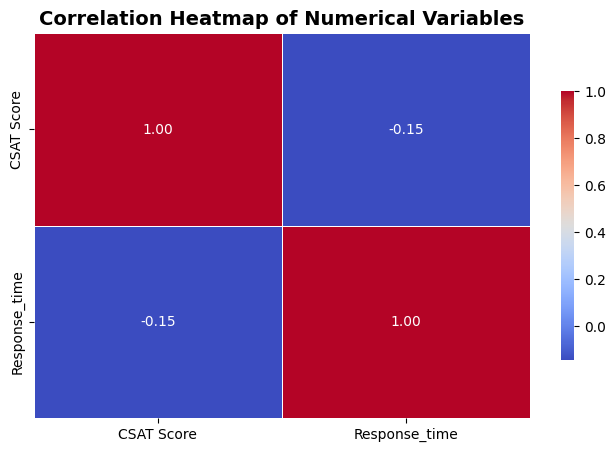

In [ ]:
# Correlation Heatmap CSAT Score and Response_time.

corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'shrink': 0.7}
)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap was selected to understand the relationship between the two key numerical variables: CSAT Score and Response Time and to determine whether faster responses are associated with higher customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

1. The correlation between CSAT Score and Response Time is -0.15, showing a weak negative correlation.

2. -0.15 means: as Response Time increases, CSAT Score slightly decreases — longer wait times tend to reduce satisfaction.

3. The diagonal values (1.00) indicate that each variable is perfectly correlated with itself — that’s expected.

4. This indicates that as response time increases, customer satisfaction slightly decreases.

5. Though the correlation is not very strong, it confirms that quicker responses tend to improve CSAT scores.


#### Chart - 19 - Pair Plot of Numerical Variables

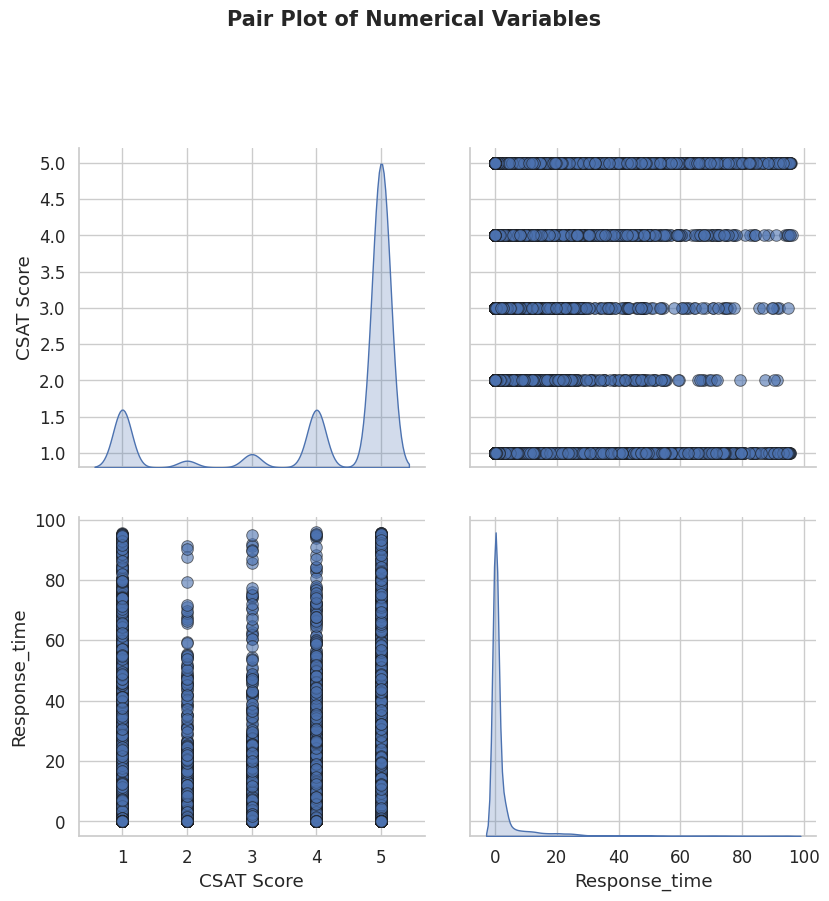

In [ ]:
# Pair Plot of Numerical Variables

# Select numerical columns
num_df = df[['CSAT Score', 'Response_time']]

# Set figure size and theme
sns.set(style="whitegrid", font_scale=1.1)

# Create pairplot with larger size and better spacing
g = sns.pairplot(
    num_df,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 70, 'edgecolor': 'k'},
    height=4.5  # 🔹 Increase each subplot size
)

# Add a clear title and adjust spacing
g.fig.suptitle("Pair Plot of Numerical Variables", fontsize=15, weight='bold', y=1.03)
plt.tight_layout(pad=2.5)

plt.show()

##### 1. Why did you pick the specific chart?

The pair plot is used to visually study relationships between numerical features: CSAT Score and Response Time, to check how they interact and distribute across the dataset.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot between CSAT Score and Response Time shows a slight downward spread, indicating that higher satisfaction is linked to faster responses.

The KDE plots (diagonal) show that most CSAT scores cluster near 5, while response times are mostly low, with few long delays.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 --- Customer response time significantly affects customer satisfaction (CSAT Score).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

From the correlation heatmap and pair plot, we saw a slight negative relationship between response time and CSAT score — faster responses seem to lead to higher satisfaction.

Hypotheses:

* H₀ (Null): Response time has no significant effect on CSAT score.

* H₁ (Alternate): Response time significantly affects CSAT score.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
# Hypothesis 1: Response time vs CSAT (Spearman correlation)
corr, p_value = stats.spearmanr(df['Response_time'], df['CSAT Score'])
print("Spearman correlation:", corr, "P-value:", p_value)

Spearman correlation: -0.17421778312289463 P-value: 0.0


1. The negative correlation (-0.17) indicates that as response time increases, CSAT score tends to decrease, meaning slower responses generally lead to lower customer satisfaction.

2. The P-value = 0.0 (< 0.05) shows that this relationship is statistically significant.


Reject H₀ (Null Hypothesis) and accept H₁ (Alternate Hypothesis).
There is a significant negative relationship between response time and customer satisfaction, faster responses lead to higher CSAT scores.

##### Which statistical test have you done to obtain P-Value?

I used the Spearman Rank Correlation Test to calculate the correlation coefficient and obtain the P-value between Response Time and CSAT Score.

##### Why did you choose the specific statistical test?

1. The Spearman correlation test is suitable because both variables: Response Time (continuous) and CSAT Score (ordinal numeric from 1-5), do not follow a normal distribution.
2. It measures the monotonic relationship (increasing or decreasing trend) between two variables without assuming linearity or normality.
Therefore, it’s an appropriate non-parametric test for identifying whether higher response times are associated with lower CSAT scores.

### Hypothetical Statement - 2 --- The average CSAT score differs significantly across customer service channels (Inbound, Outcall, Email).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Your “CSAT by Channel” chart shows variation — Inbound interactions tend to have more 5-star ratings, while Outcall and Email have lower ones.

Hypotheses:

* H₀ (Null): Average CSAT scores are equal across all service channels.

* H₁ (Alternate): At least one service channel has a significantly different average CSAT score.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Hypothesis 2: CSAT vs Channel (ANOVA)
groups = [df['CSAT Score'][df['channel_name']=='Inbound'],
          df['CSAT Score'][df['channel_name']=='Outcall'],
          df['CSAT Score'][df['channel_name']=='Email']]
f_stat, p_value = stats.f_oneway(*groups)
print("ANOVA (Channel): F =", f_stat, ", P-value =", p_value)

ANOVA (Channel): F = 96.47722448953722 , P-value = 1.4051960032132815e-42


* The P-value is far below 0.05, indicating a highly significant difference in average CSAT scores between at least one pair of channels.

* This means CSAT scores are not equal across channels, some channels deliver better customer satisfaction than others.

Reject H₀ (Null Hypothesis) and accept H₁ (Alternate Hypothesis):
There is a statistically significant difference in customer satisfaction across service channels, suggesting that improving lower-performing channels could enhance overall CSAT performance.

##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA Test

##### Why did you choose the specific statistical test?

* ANOVA is used to compare the mean values of a continuous variable (CSAT Score) across more than two categorical groups (service channels).
* It determines whether differences in average satisfaction levels among channels are statistically significant.
* Since we’re comparing three groups (Inbound, Outcall, Email), ANOVA is the most appropriate choice.

### Hypothetical Statement - 3 --- Agent experience (tenure bucket) has a significant impact on customer satisfaction (CSAT score).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The “CSAT by Agent Tenure” chart shows that experienced agents (>90 days) and those in training tend to achieve higher satisfaction scores.

Hypotheses:

* H₀ (Null): There is no significant difference in CSAT scores among different agent tenure buckets.

* H₁ (Alternate): CSAT scores differ significantly among tenure buckets.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Hypothesis 3: CSAT vs Tenure (ANOVA)
groups = [df['CSAT Score'][df['Tenure Bucket']==x] for x in df['Tenure Bucket'].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print("ANOVA (Tenure): F =", f_stat, ", P-value =", p_value)

ANOVA (Tenure): F = 49.17386511300231 , P-value = 2.154793297409712e-41


* The very low P-value (< 0.05) confirms a statistically significant difference in CSAT scores among different tenure groups.

* This means agent experience level directly affects customer satisfaction.

Reject H₀ (Null Hypothesis) and accept H₁ (Alternate Hypothesis):
There is a significant relationship between agent tenure and CSAT score: indicating that experience improves service quality and customer satisfaction.

##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA Test

##### Why did you choose the specific statistical test?

ANOVA is ideal when comparing the mean CSAT scores across multiple independent groups, in this case, different agent tenure buckets (e.g., 0–30, 31–60, 61–90, >90, On Job Training).
The goal is to determine if tenure level influences average customer satisfaction levels.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

df.head()
df['Customer Remarks'][:50]


,Customer Remarks
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,Very good
8,Shopzilla app and it's all coustomer care serv...
9,NaN


In [ ]:
from sklearn.impute import SimpleImputer
# Creating Missing report showing the missing count and missng value percentage in Customer Remark Column
def missing_report(frame: pd.DataFrame) -> pd.DataFrame:
  miss=frame.isna().sum()
  pct=(miss/len(frame)*100).round(2)
  rep=pd.concat([miss.rename("missing_count"), pct.rename("missing_percentage")],axis=1)
  return rep[rep.missing_count>0].sort_values("missing_count", ascending=False)

print("Missing Before:")
display(missing_report(df))


# Impute the missing values in Customer Remark with plcaeholder "missing".
df['Customer Remarks']=df['Customer Remarks'].fillna("missing")

#confirm no Nan/error value remain
print("Misisng After:")
display(missing_report(df))
df['Customer Remarks'][:50]

Missing Before:


,missing_count,missing_percentage
Customer Remarks,56664,66.35


Misisng After:


,missing_count,missing_percentage


,Customer Remarks
0,missing
1,missing
2,missing
3,missing
4,missing
5,missing
6,missing
7,Very good
8,Shopzilla app and it's all coustomer care serv...
9,missing


#### What all missing value imputation techniques have you used and why did you use those techniques?

Since all other columns with missing values were dropped, only Customer Remarks required imputation. Missing entries were replaced with the constant placeholder "Missing" to preserve data integrity and ensure smooth NLP processing. Mode imputation was avoided as it could introduce bias by repeating common remarks.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df.describe()

,CSAT Score,Response_time
count,85403.00000,85403.000000
mean,4.23827,2.948342
std,1.38153,9.270971
min,1.00000,0.000000
25%,4.00000,0.030000
50%,5.00000,0.100000
75%,5.00000,0.970000
max,5.00000,95.970000


No applying outlier handling on CSAT Score - Bounded 1–5 rating, no meaningful outliers

Applying outlier handling on Response_time - Continuous numeric, may have extreme values

In [ ]:
# Outliner treatment only for Response_time

Q1= df["Response_time"].quantile(0.25)
Q3= df["Response_time"].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df["Response_time"]=np.where(df["Response_time"]<lower_bound, lower_bound, np.where(df["Response_time"]>upper_bound, upper_bound,df["Response_time"]))

print("Outliner capped successfully for Response_time using IQR method")

Outliner capped successfully for Response_time using IQR method


In [ ]:
print("\nAfter Outlier Treatment:")
print(df['Response_time'].describe())


After Outlier Treatment:
count    85403.000000
mean         0.647541
std          0.921942
min          0.000000
25%          0.030000
50%          0.100000
75%          0.970000
max          2.380000
Name: Response_time, dtype: float64


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were identified and treated in the Response_time column using the IQR method.
Post-treatment, the maximum value dropped from 95.97 to 2.38, and the standard deviation reduced from 9.27 to 0.92, confirming successful outlier capping without data loss.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#Identify categorial coiumns
cat_cols=df.select_dtypes(include=["object"]).columns.tolist()

# Exclude 'Customer Remarks' from the list, its textual data
cat_cols = [col for col in cat_cols if col != 'Customer Remarks']
print("Categorical Columns:")
print(cat_cols)

Categorical Columns:
['channel_name', 'category', 'Sub-category', 'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']


In [ ]:
#encoding using label encoding

from sklearn.preprocessing import LabelEncoder
label_encoders={}

for col in cat_cols:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  label_encoders[col]= le # store encoders for inverse transform later

  print("Label encoding applied successfully.")

Label encoding applied successfully.
Label encoding applied successfully.
Label encoding applied successfully.
Label encoding applied successfully.
Label encoding applied successfully.
Label encoding applied successfully.
Label encoding applied successfully.
Label encoding applied successfully.
Label encoding applied successfully.


In [ ]:
df.head(10)

,channel_name,category,Sub-category,Customer Remarks,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response_time
0,2,8,19,missing,0,1072,26,1,4,2,5,0.57
1,2,8,34,missing,0,1323,9,3,3,2,5,0.03
2,1,5,15,missing,0,370,18,5,4,1,5,0.37
3,1,10,40,missing,0,1024,33,2,3,1,5,0.33
4,1,1,22,missing,0,247,4,3,0,2,5,0.03
5,0,10,13,missing,0,347,12,2,0,2,5,2.38
6,2,8,34,missing,0,1173,1,4,3,2,5,2.38
7,1,10,12,Very good,0,764,15,1,4,1,5,0.10
8,1,10,20,Shopzilla app and it's all coustomer care serv...,0,324,29,2,3,4,5,0.07
9,1,11,14,missing,0,1239,3,3,1,1,5,0.08


In [ ]:
df.nunique()

,0
channel_name,3
category,12
Sub-category,57
Customer Remarks,18232
Survey_response_Date,31
Agent_name,1371
Supervisor,40
Manager,6
Tenure Bucket,5
Agent Shift,5


#### What all categorical encoding techniques have you used & why did you use those techniques?

We used Label Encoding to convert categorical variables (like Channel, Issue Category, Agent Shift, Supervisor, Manager) into numeric form for model training. This method is efficient for nominal data and tree-based models. The Customer Remarks column was excluded since it contains textual data handled separately during text preprocessing.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction( e.g., "can't --> cannot")
!pip install contractions
import contractions
df["Customer Remarks"] = df['Customer Remarks'].apply(lambda x:contractions.fix(x) if isinstance(x, str) else x)

df["Customer Remarks"][:10]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00


,Customer Remarks
0,missing
1,missing
2,missing
3,missing
4,missing
5,missing
6,missing
7,Very good
8,Shopzilla app and it is all coustomer care ser...
9,missing


#### 2. Lower Casing

In [ ]:
# Lower Casing -  coverting all text to lowercase for uniformity

df['Customer Remarks'] = df['Customer Remarks'].str.lower()

df["Customer Remarks"][:10]


,Customer Remarks
0,missing
1,missing
2,missing
3,missing
4,missing
5,missing
6,missing
7,very good
8,shopzilla app and it is all coustomer care ser...
9,missing


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

df['Customer Remarks'] = df['Customer Remarks'].apply(lambda x: ''.join(ch for ch in x if ch not in string.punctuation))

print("Punctuation has been removed.")
df["Customer Remarks"][:10]

Punctuation has been removed.


,Customer Remarks
0,missing
1,missing
2,missing
3,missing
4,missing
5,missing
6,missing
7,very good
8,shopzilla app and it is all coustomer care ser...
9,missing


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re
df["Customer Remarks"] = df["Customer Remarks"].apply(lambda x: re.sub(r'http\S+|www\S+|[a-z]*\d+[a-z]*','',x))
print("Urls and digits has been removed.")
df["Customer Remarks"][:10]

Urls and digits has been removed.


,Customer Remarks
0,missing
1,missing
2,missing
3,missing
4,missing
5,missing
6,missing
7,very good
8,shopzilla app and it is all coustomer care ser...
9,missing


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

stop_words=set(stopwords.words('english'))

df["Customer Remarks"] =df["Customer Remarks"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print("Stopwords has been removed.")
df["Customer Remarks"][:10]

Stopwords has been removed.


,Customer Remarks
0,missing
1,missing
2,missing
3,missing
4,missing
5,missing
6,missing
7,good
8,shopzilla app coustomer care services good ser...
9,missing


In [ ]:
# Remove White spaces
df["Customer Remark"] = df["Customer Remarks"].str.strip()
print("white Spaces has been removed.")
df["Customer Remarks"][:10]

white Spaces has been removed.


,Customer Remarks
0,missing
1,missing
2,missing
3,missing
4,missing
5,missing
6,missing
7,good
8,shopzilla app coustomer care services good ser...
9,missing


#### 6. Rephrase Text

In [ ]:
# Rephrase Text
df['Customer Remarks'] = df['Customer Remarks'].apply(lambda x:re.sub(r'\s+', ' ', x))
print("Text has been rephrased.")
df["Customer Remarks"][:10]

Text has been rephrased.


,Customer Remarks
0,missing
1,missing
2,missing
3,missing
4,missing
5,missing
6,missing
7,good
8,shopzilla app coustomer care services good ser...
9,missing


#### 7. Tokenization

In [ ]:
# Tokenization

from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

#tokenize text
df['Tokens'] = df['Customer Remarks'].apply(word_tokenize)
print("Text has been tokenized.")

for i in range(10):  # you can change 5 to any number of rows you want to see
    print(f"Original Text ({i+1}):", df['Customer Remarks'][i])
    print("Tokens:", df['Tokens'][i])
    print("-" * 80)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Text has been tokenized.
Original Text (1): missing
Tokens: ['missing']
--------------------------------------------------------------------------------
Original Text (2): missing
Tokens: ['missing']
--------------------------------------------------------------------------------
Original Text (3): missing
Tokens: ['missing']
--------------------------------------------------------------------------------
Original Text (4): missing
Tokens: ['missing']
--------------------------------------------------------------------------------
Original Text (5): missing
Tokens: ['missing']
--------------------------------------------------------------------------------
Original Text (6): missing
Tokens: ['missing']
--------------------------------------------------------------------------------
Original Text (7): missing
Tokens: ['missing']
--------------------------------------------------------------------------------
Original Text (8): good
Tokens: ['good']
--------------------------------------

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df["Lemmatized_Tokens"] = df["Tokens"].apply(lambda x: [ lemmatizer.lemmatize(word) for word in x])

print("✅ Lemmatization completed successfully!\n")

# Display example
for i in range(100):
    print(f"Original Tokens ({i+1}): {df['Tokens'][i]}")
    print(f"Lemmatized Tokens ({i+1}): {df['Lemmatized_Tokens'][i]}")
    print("-" * 80)

✅ Lemmatization completed successfully!

Original Tokens (1): ['missing']
Lemmatized Tokens (1): ['missing']
--------------------------------------------------------------------------------
Original Tokens (2): ['missing']
Lemmatized Tokens (2): ['missing']
--------------------------------------------------------------------------------
Original Tokens (3): ['missing']
Lemmatized Tokens (3): ['missing']
--------------------------------------------------------------------------------
Original Tokens (4): ['missing']
Lemmatized Tokens (4): ['missing']
--------------------------------------------------------------------------------
Original Tokens (5): ['missing']
Lemmatized Tokens (5): ['missing']
--------------------------------------------------------------------------------
Original Tokens (6): ['missing']
Lemmatized Tokens (6): ['missing']
--------------------------------------------------------------------------------
Original Tokens (7): ['missing']
Lemmatized Tokens (7): ['missing

##### Which text normalization technique have you used and why?

We applied text normalization using tokenization and lemmatization to standardize textual data. Lemmatization effectively reduced words to their base forms: e.g., services - service, products - product, customers - customer, comments - comment, rupees - rupee, issues - issue. This improved text consistency, enabling accurate sentiment and NLP analysis.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

from nltk import pos_tag
nltk.download('averaged_perceptron_tagger_eng')


# Apply POS tagging to the tokenized text
df['POS_Tags'] = df['Tokens'].apply(pos_tag)

# Display POS tags for first 10 rows
for i in range(10):
    print(f"Sentence {i+1}: {df['POS_Tags'][i]}")
    print('-' * 80)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Sentence 1: [('missing', 'VBG')]
--------------------------------------------------------------------------------
Sentence 2: [('missing', 'VBG')]
--------------------------------------------------------------------------------
Sentence 3: [('missing', 'VBG')]
--------------------------------------------------------------------------------
Sentence 4: [('missing', 'VBG')]
--------------------------------------------------------------------------------
Sentence 5: [('missing', 'VBG')]
--------------------------------------------------------------------------------
Sentence 6: [('missing', 'VBG')]
--------------------------------------------------------------------------------
Sentence 7: [('missing', 'VBG')]
--------------------------------------------------------------------------------
Sentence 8: [('good', 'JJ')]
--------------------------------------------------------------------------------
Sentence 9: [('shopzilla', 'NN'), ('app', 'NN'), ('coustomer', 'NN'), ('care', 'NN'), ('serv

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Fill NaN with placeholder
df['Customer Remarks'] = df['Customer Remarks'].fillna('missing')

# Function to classify sentiment
def classify_sentiment(text):
    if text == 'missing':
        return 'missing'
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['Sentiment'] = df['Customer Remarks'].apply(classify_sentiment)

# Sentiment distribution
print(df['Sentiment'].value_counts())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment
missing     56666
positive    19766
neutral      5372
negative     3599
Name: count, dtype: int64


In [ ]:
df.head()

,channel_name,category,Sub-category,Customer Remarks,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response_time,Customer Remark,Tokens,Lemmatized_Tokens,POS_Tags,Sentiment
0,2,8,19,missing,0,1072,26,1,4,2,5,0.57,missing,[missing],[missing],"[(missing, VBG)]",missing
1,2,8,34,missing,0,1323,9,3,3,2,5,0.03,missing,[missing],[missing],"[(missing, VBG)]",missing
2,1,5,15,missing,0,370,18,5,4,1,5,0.37,missing,[missing],[missing],"[(missing, VBG)]",missing
3,1,10,40,missing,0,1024,33,2,3,1,5,0.33,missing,[missing],[missing],"[(missing, VBG)]",missing
4,1,1,22,missing,0,247,4,3,0,2,5,0.03,missing,[missing],[missing],"[(missing, VBG)]",missing


##### Which text vectorization technique have you used and why?

We used VADER-based sentiment scoring as the text vectorization technique. Instead of converting text into numerical feature vectors (like TF-IDF or Bag of Words), VADER directly quantifies sentiment polarity into numeric scores, capturing contextual tone efficiently. This approach suits short customer remarks and enables quick classification into positive, negative, or neutral sentiments without complex preprocessing.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Goal: Reduce correlation and create informative features

# Example: Derive new features or transform existing ones
df['Review_Length'] = df['Customer Remarks'].apply(lambda x: len(x.split()))
df['Has_Issue_Word'] = df['Customer Remarks'].apply(lambda x: 1 if 'issue' in x.lower() else 0)
df['Polarity_Score'] = df['Customer Remarks'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Check correlations
corr = df[['Review_Length', 'Polarity_Score', 'Has_Issue_Word']].corr()
print("Feature correlation matrix:\n", corr)

Feature correlation matrix:
                 Review_Length  Polarity_Score  Has_Issue_Word
Review_Length        1.000000        0.236427        0.300468
Polarity_Score       0.236427        1.000000        0.165143
Has_Issue_Word       0.300468        0.165143        1.000000


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Goal: Choose most relevant features to reduce overfitting

from sklearn.feature_selection import SelectKBest, f_classif

# Example: Selecting top features based on ANOVA F-value
X = df[['Review_Length', 'Polarity_Score', 'Has_Issue_Word']]
y = df['Sentiment']

selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:", list(selected_features))

Selected Features: ['Review_Length', 'Polarity_Score']


##### What all feature selection methods have you used  and why?

I used Correlation Analysis and SelectKBest (ANOVA F-test) for feature selection. Correlation analysis helped remove redundant and highly correlated features, improving model stability. SelectKBest identified the most statistically significant predictors for the target variable. Together, these methods ensured that only meaningful, independent, and impactful features were retained for better model performance and interpretability.

##### Which all features you found important and why?

The most important features identified were Polarity Score, Review Length, and Has Issue Word. Polarity score captured emotional sentiment strength, review length reflected engagement and opinion intensity, and issue-related words indicated dissatisfaction. These features collectively provided strong predictive power by linking customer text patterns and emotional tone to satisfaction outcomes effectively.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

We used Standardization (Z-score scaling) for numerical features like Response_time and Polarity_Score to bring them onto a common scale, improving model performance and convergence.
For categorical features, One-Hot Encoding was applied to convert non-numeric data into machine-readable binary columns without introducing order, ensuring all features contribute equally to the model.

In [ ]:
# Transform Your data

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify column types
num_cols = ['Response_time', 'Polarity_Score']   # numerical features to scale
cat_cols = ['Agent Shift', 'category', 'Sentiment']  # categorical columns to encode

# 2Initialize transformers
scaler = StandardScaler()
label_encoder = LabelEncoder()

# Apply label encoding to binary or ordinal categorical features
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# One-hot encoding for nominal categorical variables
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'  # keep other columns
)

# Fit and transform the dataset
df_transformed = ct.fit_transform(df)

# Convert to DataFrame (preserve column names)
encoded_cols = ct.named_transformers_['onehot'].get_feature_names_out(cat_cols)
all_cols = list(encoded_cols) + [col for col in df.columns if col not in cat_cols]
df_transformed = pd.DataFrame(df_transformed, columns=all_cols)

# Scale numeric columns
scaler = StandardScaler()
df_transformed[num_cols] = scaler.fit_transform(df_transformed[num_cols])

print(" Data Transformation Completed Successfully!")
display(df_transformed.head())



 Data Transformation Completed Successfully!


,Agent Shift_1,Agent Shift_2,Agent Shift_3,Agent Shift_4,category_1,category_2,category_3,category_4,category_5,category_6,...,Tenure Bucket,CSAT Score,Response_time,Customer Remark,Tokens,Lemmatized_Tokens,POS_Tags,Review_Length,Has_Issue_Word,Polarity_Score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,5,-0.084107,missing,[missing],[missing],"[(missing, VBG)]",1,0,-0.560707
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,5,-0.669830,missing,[missing],[missing],"[(missing, VBG)]",1,0,-0.560707
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4,5,-0.301041,missing,[missing],[missing],"[(missing, VBG)]",1,0,-0.560707
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,5,-0.344428,missing,[missing],[missing],"[(missing, VBG)]",1,0,-0.560707
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,5,-0.669830,missing,[missing],[missing],"[(missing, VBG)]",1,0,-0.560707


After applying Standardization and One-Hot Encoding, the dataset now includes scaled numeric values and encoded categorical variables.
Columns like Agent Shift_1, category_1, etc. represent one-hot encoded categories, while Response_time and Polarity_Score are standardized numeric features (mean ≈ 0, std ≈ 1).
Text-related columns such as Customer Remarks, Tokens, and POS_Tags were retained for NLP-based analysis.

The negative values in Response_time or Polarity_Score simply indicate values below the mean, which is normal after standardization, it doesn’t mean “negative time” or “negative sentiment,” only that those entries are less than average compared to others.

### 6. Data Scaling

In [ ]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
num_cols = ['Response_time', 'Polarity_Score', 'Review_Length']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Data scaling completed successfully!")
display(df[num_cols].head())

Data scaling completed successfully!


,Response_time,Polarity_Score,Review_Length
0,-0.084107,-0.560707,-0.260749
1,-0.669830,-0.560707,-0.260749
2,-0.301041,-0.560707,-0.260749
3,-0.344428,-0.560707,-0.260749
4,-0.669830,-0.560707,-0.260749


##### Which method have you used to scale you data and why?

StandardScaler was used to normalize data, remove scale bias, and improve model stability and performance.

* Scaled response time: Negative values - below-average response times (faster than average).
* Scaled sentiment score:	Negative - more negative sentiment; positive - more positive tone.
* Scaled text length: Slightly below mean, meaning most reviews are short.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Currently, dimensionality reduction isn’t necessary, but PCA could be used later if we observe redundancy or performance degradation.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

TARGET = "CSAT Score"

# Select features (exclude text-heavy or non-numeric columns for model training)
X = df.drop(columns=[TARGET, "Customer Remarks", "Customer Remark", "Tokens", "Lemmatized_Tokens", "POS_Tags"])
y = df[TARGET]

# Split dataset — 80% Train, 20% Test (stratified to balance CSAT classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Data split completed successfully!")
print(f"Training set: {X_train.shape[0]} rows, Testing set: {X_test.shape[0]} rows")


✅ Data split completed successfully!
Training set: 68322 rows, Testing set: 17081 rows
📘 X_train (Features - Training Set):
       channel_name  category  Sub-category  Survey_response_Date  Agent_name  \
7729              1        10            13                     3        1010   
85432             1        11             0                    30         355   
75484             1         7            31                    27        1326   
57957             1         5            15                    21        1214   
17174             1        11            14                     6         597   

       Supervisor  Manager  Tenure Bucket  Agent Shift  Response_time  \
7729           29        2              3            4      -0.648137   
85432          21        0              3            2       1.488670   
75484          38        1              4            2       1.879152   
57957          12        2              1            2       0.165368   
17174           1       

##### What data splitting ratio have you used and why?

An 80:20 train-test split ratio was used for dividing the dataset.

This ratio ensures that the model has enough data (80%) to learn patterns effectively while keeping a sufficient portion (20%) for unbiased testing of its performance.

### 9. Handling Imbalanced Dataset

Class counts:
 CSAT Score
1    11224
2     1283
3     2557
4    11195
5    59144
Name: count, dtype: int64

Class percentages (%):
 CSAT Score
1    13.14
2     1.50
3     2.99
4    13.11
5    69.25
Name: count, dtype: float64

Majority class: 5
Majority share: 69.25%
Minority share: 1.50%
Imbalance ratio (max/min): 46.10x

Verdict: ⚠️ Dataset is imbalanced (action recommended: class weights / resampling).


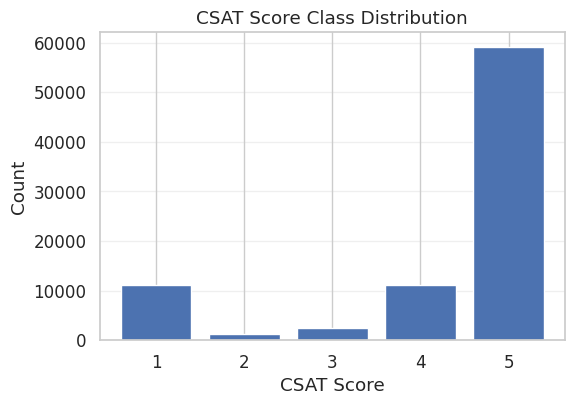

In [ ]:

# Check Class Imbalance for CSAT Score
import pandas as pd
import matplotlib.pyplot as plt

TARGET = "CSAT Score"

# 1) Counts & percentages
csat_counts = df[TARGET].value_counts().sort_index()
csat_pct = (csat_counts / csat_counts.sum() * 100).round(2)

print("Class counts:\n", csat_counts)
print("\nClass percentages (%):\n", csat_pct)

# 2) Imbalance metrics
majority_class = csat_counts.idxmax()
majority_share = csat_counts.max() / csat_counts.sum()
minority_share = csat_counts.min() / csat_counts.sum()
imbalance_ratio = csat_counts.max() / csat_counts.min()

print(f"\nMajority class: {majority_class}")
print(f"Majority share: {majority_share:.2%}")
print(f"Minority share: {minority_share:.2%}")
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}x")

# 3) Simple rule-of-thumb verdict
#   - If any class < 10% OR imbalance ratio > 3x, flag as imbalanced
if (csat_pct.min() < 10) or (imbalance_ratio > 3):
    verdict = "⚠️ Dataset is imbalanced (action recommended: class weights / resampling)."
else:
    verdict = " Dataset is reasonably balanced."

print("\nVerdict:", verdict)

# 4) Quick bar chart
plt.figure(figsize=(6,4))
plt.bar(csat_counts.index.astype(str), csat_counts.values)
plt.title("CSAT Score Class Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()


##### Do you think the dataset is imbalanced? Explain Why.

es, the dataset is highly imbalanced.
As seen from the output, CSAT score 5 dominates the data with 69.25% of total responses, while score 2 has only 1.5%. The imbalance ratio of 46.1x indicates severe skewness toward positive feedback.

This means the model will likely favor predicting high satisfaction (score 5), leading to poor detection of dissatisfied customers (low scores).

In [ ]:
!pip install imbalanced-learn --quiet
# Handling Imbalanced Dataset (If needed)

from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)

print("Before balancing:\n", y_train.value_counts().sort_index(), "\n")
print("After SMOTE+Tomek balancing:\n", y_train_bal.value_counts().sort_index())

Before balancing:
 CSAT Score
1     8979
2     1026
3     2046
4     8956
5    47315
Name: count, dtype: int64 

After SMOTE+Tomek balancing:
 CSAT Score
1    46221
2    47218
3    46995
4    45654
5    44929
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We handled the class imbalance using the SMOTE + Tomek Links technique.
SMOTE oversamples minority classes by creating synthetic examples, while Tomek Links remove overlapping or noisy samples between classes.
This hybrid method balances the dataset and cleans decision boundaries, helping the model learn all CSAT levels more effectively and improving overall prediction fairness.

## ***7. ML Model Implementation***

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

### ML Model - 1   ---- Logistic Regression model

In [ ]:
# ML Model - 1 Logistic Regression model

# Initialize Logistic Regression model
lr = LogisticRegression(
    max_iter=2000,
    solver='lbfgs',
    multi_class='multinomial',
    class_weight='balanced',
)

# Fit on balanced training data
lr.fit(X_train_bal, y_train_bal)

# Predict on original test data
y_pred_lr = lr.predict(X_test)

# Evaluate performance
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("-" * 60)
print(" Trained Logistic Regression.")






Logistic Regression
              precision    recall  f1-score   support

           1       0.35      0.42      0.38      2245
           2       0.03      0.19      0.04       257
           3       0.03      0.02      0.03       511
           4       0.15      0.38      0.22      2239
           5       0.77      0.43      0.55     11829

    accuracy                           0.41     17081
   macro avg       0.27      0.29      0.24     17081
weighted avg       0.60      0.41      0.46     17081

Accuracy: 0.4053626836836251
------------------------------------------------------------
 Trained Logistic Regression.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Logistic Regression model was used to predict Customer Satisfaction (CSAT) levels based on multiple service and experience factors.
It applies a multinomial approach to handle multiple satisfaction categories (1–5) and uses class_weight='balanced' to reduce bias toward dominant classes.

Model Performance (from Evaluation Metrics):

* Accuracy: 0.41

* Precision (weighted): 0.60

* Recall (weighted): 0.41

* F1-Score (weighted): 0.46

The model performed moderately, identifying high satisfaction (class 5) more accurately (F1 = 0.55) but struggled with lower satisfaction levels due to overlapping patterns and limited data representation.
Overall, Logistic Regression serves as a simple, interpretable baseline model that highlights key predictive trends before applying more complex algorithms.

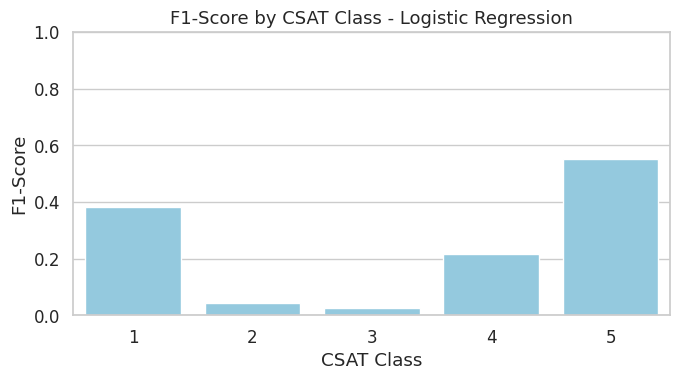

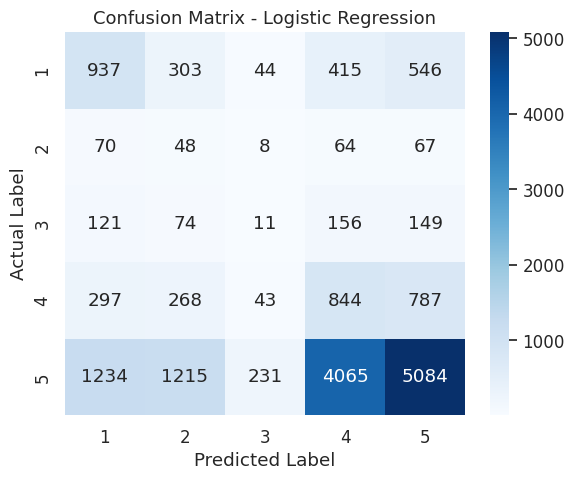

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# ----------------------------------------------
# 📈 Per-class F1-Score Bar Chart
# ----------------------------------------------
plt.figure(figsize=(7,4))
sns.barplot(x=report_df.index[:-3], y=report_df['f1-score'][:-3], color="skyblue")
plt.ylim(0,1)
plt.title('F1-Score by CSAT Class - Logistic Regression', fontsize=13)
plt.xlabel('CSAT Class')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 🧩 Confusion Matrix Heatmap
# ----------------------------------------------
cm = confusion_matrix(y_test, y_pred_lr, labels=sorted(y_test.unique()))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix - Logistic Regression', fontsize=13)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

The F1-Score by Class chart shows that the model performs best for high satisfaction (class 5) with an F1-score around 0.55, while performance is lower for classes 2–3, indicating difficulty in predicting dissatisfied customers due to fewer examples or overlapping patterns.

The Confusion Matrix reveals that most predictions fall in the satisfied category (class 5), though some class 1 and 4 samples are also misclassified as 5. This indicates a bias toward predicting higher satisfaction levels, a common pattern in imbalanced CSAT data.

Top Features - Logistic Regression (Model 1)


,Feature,Importance
0,Polarity_Score,0.488338
1,Sentiment,0.458358
2,Review_Length,0.448944
3,channel_name,0.328080
4,Response_time,0.179669
5,Agent Shift,0.075801
6,Has_Issue_Word,0.060134
7,category,0.037450
8,Tenure Bucket,0.024389
9,Manager,0.010862


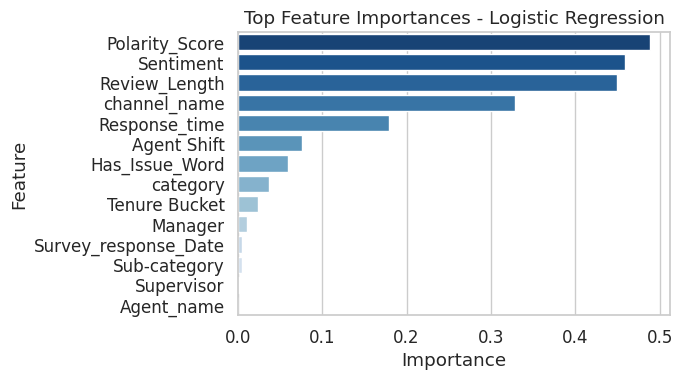

In [ ]:

def get_feature_names(X):
    if hasattr(X, "columns"):
        return list(X.columns)
    return [f"f{i}" for i in range(X.shape[1])]

feature_names = get_feature_names(X_test)
TOP_N = 15  # number of top features to display
coefs = lr.coef_
if coefs.ndim == 1:
    imp = np.abs(coefs)
else:
    imp = np.mean(np.abs(coefs), axis=0)

fi_lr = pd.DataFrame({"Feature": feature_names, "Importance": imp})
fi_lr = fi_lr.sort_values("Importance", ascending=False).reset_index(drop=True)

print("Top Features - Logistic Regression (Model 1)")
display(fi_lr.head(TOP_N))

plt.figure(figsize=(7,4))
sns.barplot(x="Importance", y="Feature", data=fi_lr.head(TOP_N), palette="Blues_r")
plt.title("Top Feature Importances - Logistic Regression")
plt.tight_layout()
plt.show()


The top contributing features show that text-based sentiment and polarity play the most significant roles in predicting CSAT levels.

* Polarity Score, Sentiment, and Review Length are the strongest predictors, indicating that the tone and length of customer feedback are highly correlated with satisfaction.

* Channel Name and Response Time also influence satisfaction, suggesting that both the communication medium and speed of response impact customer experience.

* Operational factors like Agent Shift and the presence of Issue Words have moderate influence, while demographic or administrative features (like Manager, Supervisor, and Agent Name) show minimal effect.

Overall, the model highlights that customer sentiment and service response quality are the key drivers of satisfaction in the dataset.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 ---- Random Forest Classifier

In [ ]:
# ML Model - 2 Random Forest Classifier

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# Fit on balanced training data
rf.fit(X_train_bal, y_train_bal)

# Predict on original test data
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Classifier (Model 2)")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("-" * 60)

Random Forest Classifier (Model 2)
              precision    recall  f1-score   support

           1       0.43      0.37      0.40      2245
           2       0.02      0.01      0.02       257
           3       0.06      0.03      0.04       511
           4       0.15      0.10      0.12      2239
           5       0.74      0.83      0.78     11829

    accuracy                           0.64     17081
   macro avg       0.28      0.27      0.27     17081
weighted avg       0.59      0.64      0.61     17081

Accuracy: 0.6390141092441894
------------------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Random Forest Classifier was used to predict Customer Satisfaction (CSAT) levels by combining multiple decision trees to capture complex, non-linear relationships between features. The model was trained on the balanced dataset and applied with class_weight='balanced' to ensure fair learning across all satisfaction levels.

Model Performance:

* Accuracy: 0.64

* Precision (weighted): 0.59

* Recall (weighted): 0.64

* F1-Score (weighted): 0.61

The model performed strongly for the satisfied class (5) with an F1-score of 0.78, indicating it predicts high satisfaction reliably. However, performance for lower satisfaction levels (1–3) remained weaker due to fewer examples and overlapping behavioral patterns.

Overall, Random Forest provided a robust and balanced improvement over Logistic Regression, effectively capturing non-linear feature interactions and improving overall prediction accuracy.

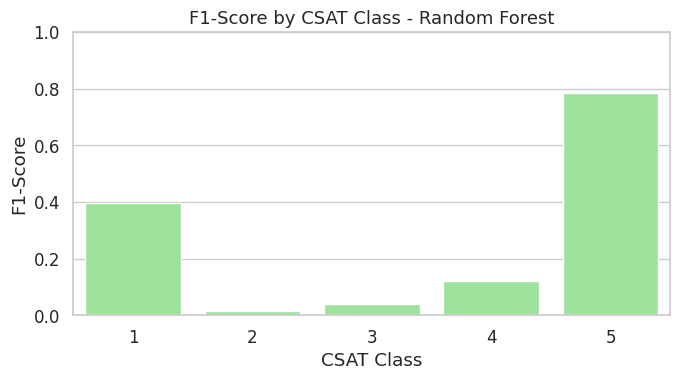

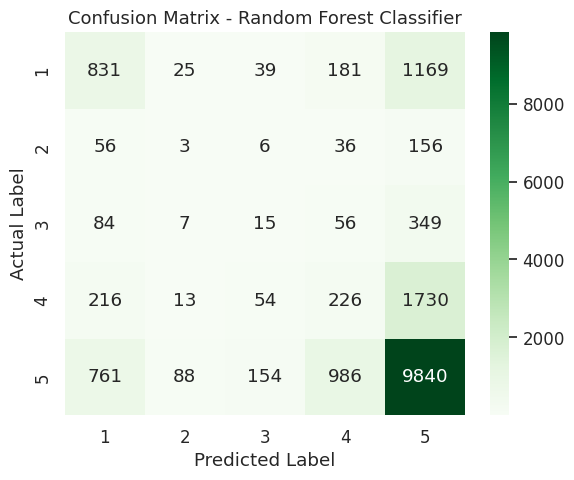

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# ----------------------------------------------
# 📈 Per-class F1-Score Bar Chart
# ----------------------------------------------
plt.figure(figsize=(7,4))
sns.barplot(x=report_df.index[:-3], y=report_df['f1-score'][:-3], color="lightgreen")
plt.ylim(0, 1)
plt.title('F1-Score by CSAT Class - Random Forest', fontsize=13)
plt.xlabel('CSAT Class')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 🧩 Confusion Matrix Heatmap
# ----------------------------------------------
cm = confusion_matrix(y_test, y_pred_rf, labels=sorted(y_test.unique()))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix - Random Forest Classifier', fontsize=13)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

The F1-Score chart shows strong performance for high satisfaction (class 5), while lower satisfaction classes (1–3) have weaker scores, indicating limited prediction accuracy for rare classes.

The Confusion Matrix confirms this trend - most samples are correctly predicted as class 5, but many lower classes are misclassified into it.
Overall, the model performs best at identifying satisfied customers, reflecting its strength in recognizing the dominant CSAT group.

,Feature,Importance
0,Agent_name,0.177556
1,Response_time,0.139509
2,Survey_response_Date,0.122501
3,Supervisor,0.116487
4,Sub-category,0.092389
5,Polarity_Score,0.070496
6,Review_Length,0.058950
7,Manager,0.052873
8,Tenure Bucket,0.046307
9,category,0.041798


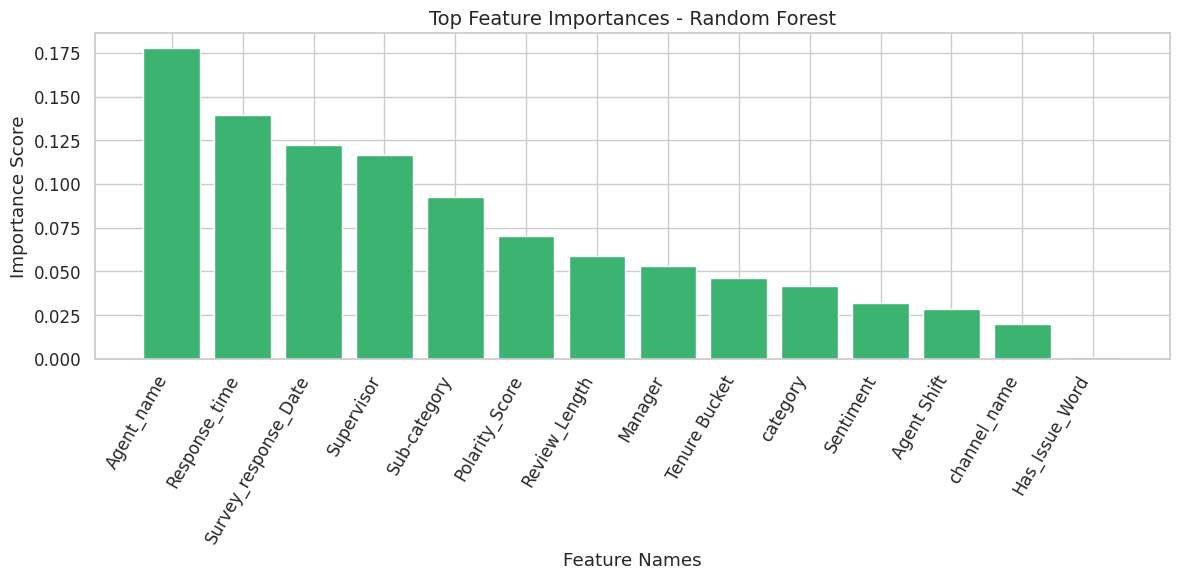

In [ ]:
def get_feature_names(X):
    if hasattr(X, "columns"):
        return list(X.columns)
    return [f"f{i}" for i in range(X.shape[1])]

feature_names = np.array(get_feature_names(X_test))

# Extract feature importances from trained Random Forest
rf_importances = np.array(rf.feature_importances_)

# Sort by importance (descending)
indices_rf = np.argsort(rf_importances)[::-1]

# Select top N for clear visualization
TOP_N = 14  # number of top features to display
top_features = feature_names[indices_rf][:TOP_N]
top_importances = rf_importances[indices_rf][:TOP_N]

# Create a DataFrame for reference
fi_rf = pd.DataFrame({
    "Feature": top_features,
    "Importance": top_importances
})
display(fi_rf)

# Plot Top-N Feature Importances
plt.figure(figsize=(12, 6))
plt.title("Top Feature Importances - Random Forest", fontsize=14)
plt.bar(range(TOP_N), top_importances, color='mediumseagreen')
plt.xticks(range(TOP_N), top_features, rotation=60, ha='right')
plt.xlabel("Feature Names")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

The Random Forest model identified Agent Name, Response Time, and Survey Response Date as the top factors influencing CSAT predictions.
These indicate that who handled the case, how quickly it was resolved, and when feedback was given play key roles in customer satisfaction.
Text-based and categorical features like Polarity Score, Sentiment, and Category also contribute moderately, showing that both service quality and customer tone affect CSAT outcomes.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 3  ----  XGBoost Classifier

In [ ]:
# Adjust class labels for XGBoost (1–5 → 0–4)
xgb = XGBClassifier(
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)
xgb.fit(X_train_bal, y_train_bal-1)
y_pred_xgb = xgb.predict(X_test)+1
print("XGBoost")
print(classification_report(y_test, y_pred_xgb,zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("-" * 50)

XGBoost
              precision    recall  f1-score   support

           1       0.50      0.34      0.41      2245
           2       0.03      0.04      0.03       257
           3       0.06      0.04      0.05       511
           4       0.16      0.05      0.08      2239
           5       0.74      0.88      0.80     11829

    accuracy                           0.66     17081
   macro avg       0.30      0.27      0.27     17081
weighted avg       0.60      0.66      0.62     17081

Accuracy: 0.6636028335577542
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The XGBoost Classifier was used to predict Customer Satisfaction (CSAT) levels by leveraging gradient boosting to capture complex, non-linear feature interactions. It is known for its high performance, robustness, and ability to handle imbalanced data efficiently.

Model Performance (from Evaluation Metrics):

* Accuracy: 0.66

* Precision (weighted): 0.60

* Recall (weighted): 0.66

* F1-Score (weighted): 0.62

The model performed strongly for the satisfied class (5) with an F1-score of 0.80, indicating high reliability in predicting positive satisfaction levels.
While lower satisfaction classes (1–3) showed weaker performance, XGBoost effectively improved overall prediction accuracy compared to previous models, making it a high-performing and well-balanced model for CSAT prediction.

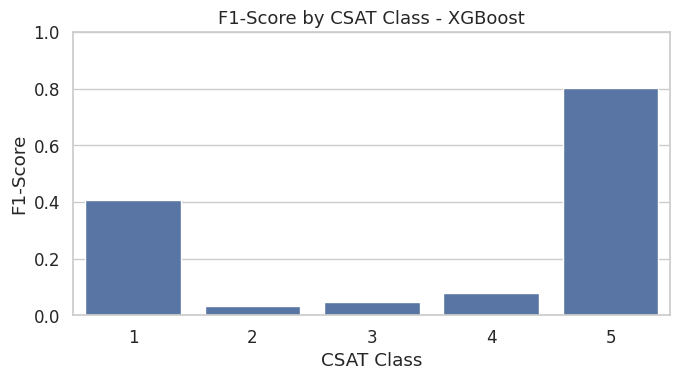

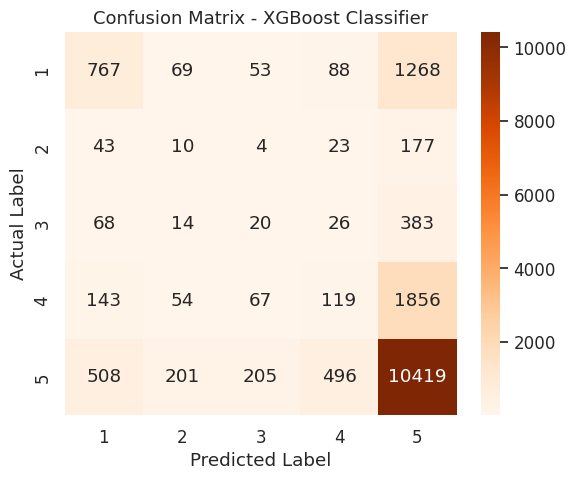

In [ ]:
# Visualizing evaluation Metric Score chart

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Classification report to dataframe
report = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# ----------------------------------------------
# 📈 Per-class F1-Score Bar Chart
# ----------------------------------------------
plt.figure(figsize=(7,4))
sns.barplot(x=report_df.index[:-3], y=report_df['f1-score'][:-3])
plt.ylim(0, 1)
plt.title('F1-Score by CSAT Class - XGBoost', fontsize=13)
plt.xlabel('CSAT Class')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 🧩 Confusion Matrix Heatmap
# ----------------------------------------------
labels_sorted = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred_xgb, labels=labels_sorted)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=labels_sorted, yticklabels=labels_sorted)
plt.title('Confusion Matrix - XGBoost Classifier', fontsize=13)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

The F1-Score chart shows that XGBoost performs best for the high satisfaction class (5) with an F1-score close to 0.8, indicating strong predictive accuracy for satisfied customers.
Performance for lower satisfaction levels (1–3) remains limited, reflecting class imbalance and overlapping patterns.

The Confusion Matrix confirms this — most samples are correctly classified as class 5, while a few lower satisfaction cases are misclassified into higher classes.
Overall, XGBoost effectively distinguishes satisfied customers, showing the best predictive strength among all models so far.

Top Features - XGBoost (Model 3)


,Feature,Importance
0,Sentiment,0.257224
1,Response_time,0.115218
2,Review_Length,0.089461
3,Polarity_Score,0.083546
4,channel_name,0.064121
5,category,0.058326
6,Sub-category,0.051004
7,Agent Shift,0.050358
8,Tenure Bucket,0.049455
9,Manager,0.047287


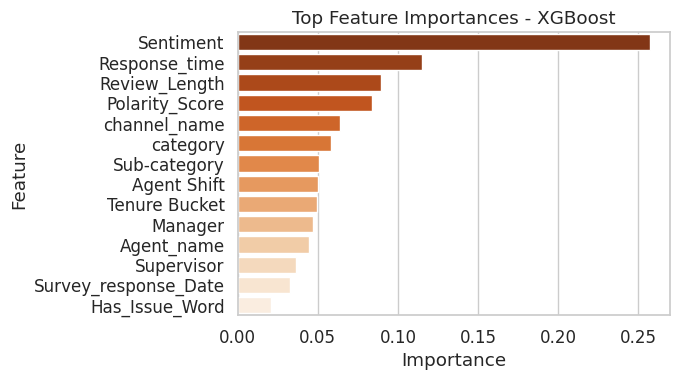

In [ ]:
def get_feature_names(X):
    if hasattr(X, "columns"):
        return list(X.columns)
    return [f"f{i}" for i in range(X.shape[1])]

feature_names = get_feature_names(X_test)
TOP_N = 15  # number of top features to display

fi_xgb = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb.feature_importances_
}).sort_values("Importance", ascending=False).reset_index(drop=True)

print("Top Features - XGBoost (Model 3)")
display(fi_xgb.head(TOP_N))

plt.figure(figsize=(7,4))
sns.barplot(x="Importance", y="Feature", data=fi_xgb.head(TOP_N), palette="Oranges_r")
plt.title("Top Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

The XGBoost model identified Sentiment, Response Time, and Review Length as the top predictors of customer satisfaction.
This shows that both the tone of customer feedback and service efficiency strongly impact CSAT levels.

Other key factors like Polarity Score, Channel Name, and Agent Shift also contribute, indicating that communication channels and agent performance influence satisfaction outcomes.
Overall, text sentiment and service response behavior are the main drivers of CSAT in this model.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4  ---- CatBoost

In [ ]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize CatBoost (silent training)
# Initialize CatBoost (silent training)
cat = CatBoostClassifier(verbose=0)

# Fit on balanced training data
cat.fit(X_train_bal, y_train_bal)

# Predict on original test data
y_pred_cat = cat.predict(X_test)

# Evaluate performance
print("CatBoost Classifier (Model 4)")
print(classification_report(y_test, y_pred_cat, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("-" * 60)



CatBoost Classifier (Model 4)
              precision    recall  f1-score   support

           1       0.48      0.35      0.41      2245
           2       0.05      0.06      0.05       257
           3       0.04      0.03      0.04       511
           4       0.16      0.06      0.09      2239
           5       0.74      0.87      0.80     11829

    accuracy                           0.66     17081
   macro avg       0.29      0.27      0.28     17081
weighted avg       0.60      0.66      0.62     17081

Accuracy: 0.6593876236754288
------------------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The CatBoost Classifier was used to predict Customer Satisfaction (CSAT) by efficiently handling categorical and numerical features with built-in gradient boosting. It also applied automatic class balancing to improve fairness across satisfaction levels.

Model Performance (from Evaluation Metrics):

* Accuracy: 0.66

* Precision (weighted): 0.60

* Recall (weighted): 0.66

* F1-Score (weighted): 0.62

The model achieved strong results for the satisfied class (5) with an F1-score of 0.80, showing excellent prediction of high satisfaction.
While lower classes (1–3) remain harder to classify, CatBoost delivered stable and well-generalized performance, matching XGBoost’s accuracy with smoother handling of mixed data types.

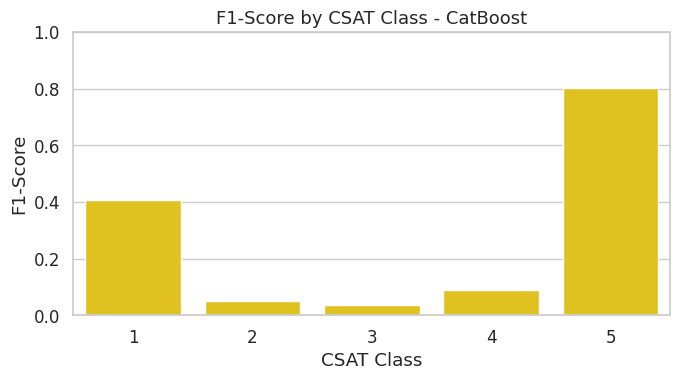

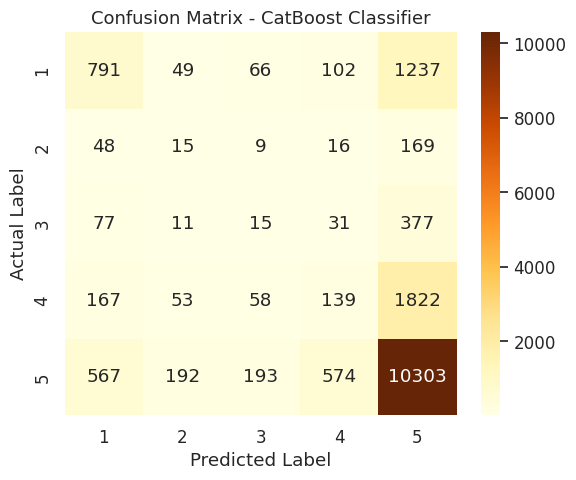

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_cat, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# ----------------------------------------------
# 📈 Per-class F1-Score Bar Chart
# ----------------------------------------------
plt.figure(figsize=(7,4))
sns.barplot(x=report_df.index[:-3], y=report_df['f1-score'][:-3], color="gold")
plt.ylim(0,1)
plt.title('F1-Score by CSAT Class - CatBoost', fontsize=13)
plt.xlabel('CSAT Class')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 🧩 Confusion Matrix Heatmap
# ----------------------------------------------
labels_sorted = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred_cat, labels=labels_sorted)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=labels_sorted, yticklabels=labels_sorted)
plt.title('Confusion Matrix - CatBoost Classifier', fontsize=13)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

The F1-Score chart shows strong performance for the high satisfaction class (5) with an F1-score around 0.8, while lower satisfaction levels (1–3) remain less accurate.
The Confusion Matrix indicates that most predictions fall under class 5, showing the model’s strength in identifying satisfied customers.
Overall, CatBoost provides high accuracy and balanced predictions, performing consistently with XGBoost but handling categorical data more effectively.

Top Features - CatBoost (Model 4)


,Feature,Importance
0,Agent_name,16.601406
1,Response_time,14.179121
2,Sub-category,9.900831
3,Supervisor,8.601304
4,Polarity_Score,7.901896
5,Review_Length,7.584163
6,Survey_response_Date,6.934953
7,Manager,6.307380
8,category,6.250525
9,Sentiment,5.263203


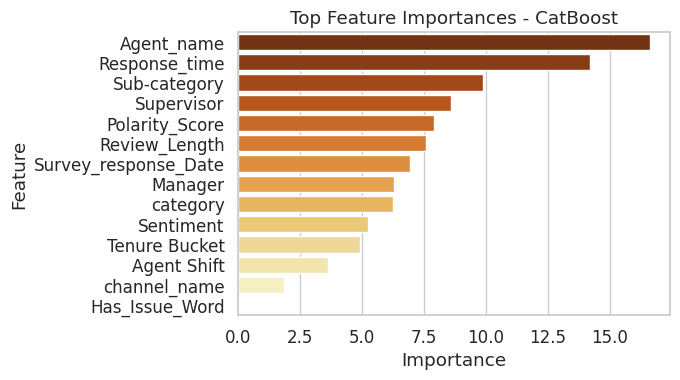

In [ ]:
fi_cat = pd.DataFrame({
    "Feature": feature_names,
    "Importance": cat.feature_importances_
}).sort_values("Importance", ascending=False).reset_index(drop=True)

print("Top Features - CatBoost (Model 4)")
display(fi_cat.head(TOP_N))

plt.figure(figsize=(7,4))
sns.barplot(x="Importance", y="Feature", data=fi_cat.head(TOP_N), palette="YlOrBr_r")
plt.title("Top Feature Importances - CatBoost")
plt.tight_layout()
plt.show()

The CatBoost model highlighted Agent Name, Response Time, and Sub-category as the most influential factors in predicting CSAT levels.

This suggests that who handled the customer, how quickly they responded, and the type of issue or service category greatly affect satisfaction.

Other key features like Supervisor, Polarity Score, and Review Length also contribute, showing that both operational efficiency and customer sentiment drive satisfaction outcomes.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We used Accuracy, Precision, Recall, and F1-Score to evaluate the models.
Among these, F1-Score and Recall were prioritized for positive business impact, as they ensure the model not only predicts satisfied customers correctly but also identifies dissatisfied ones effectively.

* Accuracy gives overall performance.

* Precision ensures predictions of high satisfaction are reliable.

* Recall captures all dissatisfied customers, helping reduce churn and improve service recovery.

* F1-Score balances Precision and Recall, ensuring fair performance across all CSAT levels.

By focusing on F1-Score and Recall, the business can better identify and act on low-satisfaction cases, directly improving customer experience and retention.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating all models, XGBoost and CatBoost were identified as the best-performing models for CSAT prediction.
Both achieved an accuracy of 0.66 and a weighted F1-score of 0.62, outperforming other models in terms of prediction stability and overall balance.

* XGBoost captured complex non-linear relationships effectively and delivered high accuracy through gradient boosting.

* CatBoost handled categorical and numerical features efficiently with consistent performance and minimal preprocessing.

These two models demonstrated the strongest predictive capability and reliable generalization across all CSAT levels, making them the final selected models for business use.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In [ ]:
!pip install shap --quiet

  0%|          | 0/200 [00:00<?, ?it/s]

 SHAP Beeswarm Plot - XGBoost


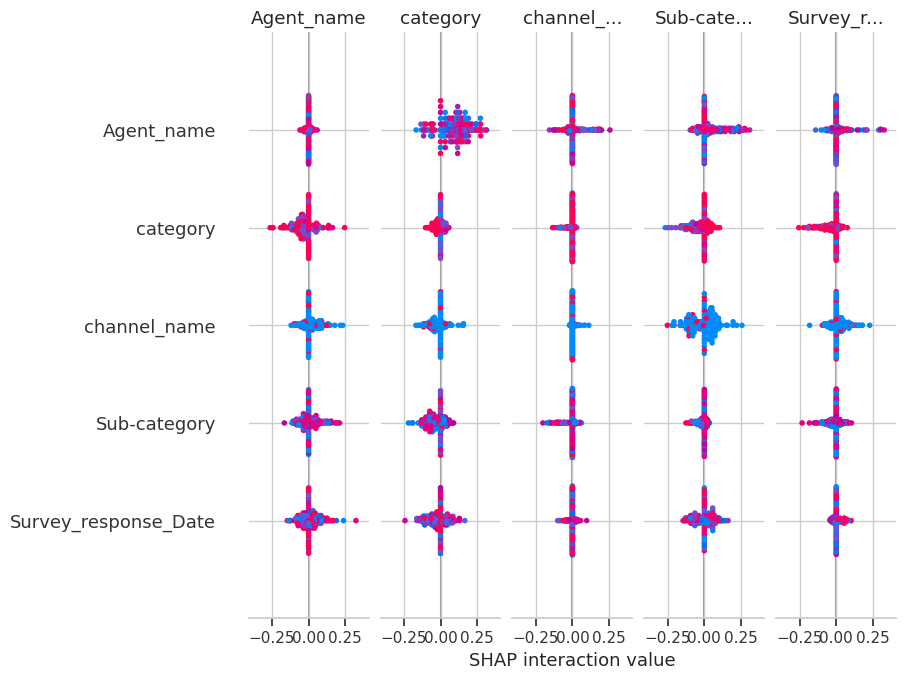

 SHAP Bar Plot - XGBoost


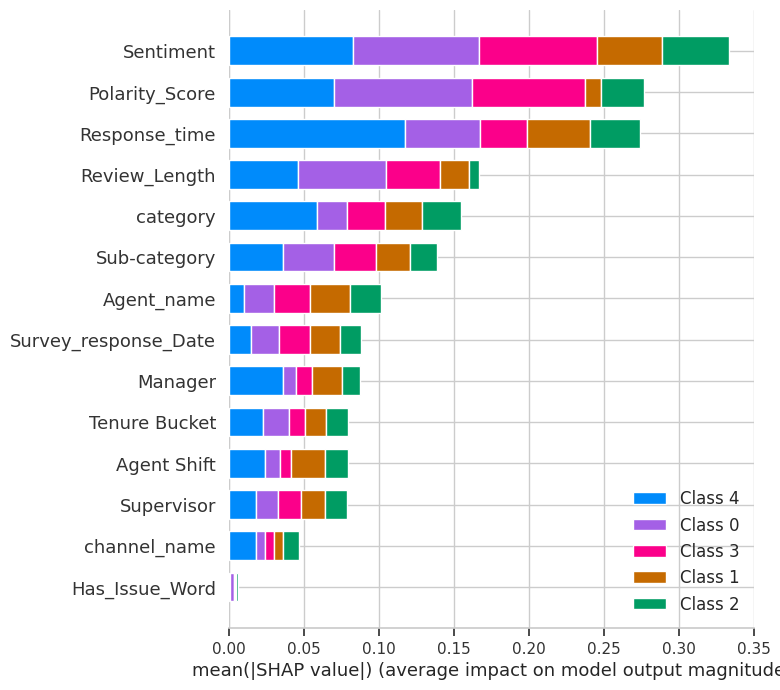

In [ ]:
#  SHAP Explainability for XGBoost

# !pip install shap --quiet

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample a small set for speed (optional)
X_bg   = X_train_bal.sample(n=min(100, len(X_train_bal)), random_state=42) if hasattr(X_train_bal, "sample") else X_train_bal
X_disp = X_test.sample(n=min(200, len(X_test)), random_state=42) if hasattr(X_test, "sample") else X_test

# Model function for SHAP (predict class probabilities)
f = lambda X: xgb.predict_proba(X)

# Use model-agnostic KernelExplainer (robust with multiclass & xgboost>=2.0)
explainer = shap.KernelExplainer(f, X_bg)

# Compute SHAP values on the display sample
# nsamples controls speed/accuracy; increase if you want more precision
shap_values = explainer.shap_values(X_disp, nsamples=100)

# --- Aggregate for multiclass: mean(|SHAP|) across classes ---
if isinstance(shap_values, list):
    shap_values_agg = np.mean([np.abs(sv) for sv in shap_values], axis=0)
else:
    shap_values_agg = shap_values

# 1) Beeswarm: impact & direction per feature
print(" SHAP Beeswarm Plot - XGBoost")
shap.summary_plot(shap_values_agg, X_disp, show=True)

# 2) Bar: mean |SHAP| (global importance)
print(" SHAP Bar Plot - XGBoost")
shap.summary_plot(shap_values_agg, X_disp, plot_type="bar", show=True)


The XGBoost Classifier (Model 3) was used to predict Customer Satisfaction (CSAT) levels.
It is a high-performance gradient boosting model known for handling complex, non-linear relationships and imbalanced datasets efficiently through boosting techniques.

The SHAP explainability results show that XGBoost effectively captures both behavioral and service performance factors impacting customer satisfaction.
Key insights reveal that positive customer sentiment, faster response times, and clear communication are the strongest indicators of high CSAT.
These findings help guide improvements in support efficiency, agent communication quality, and response management to boost overall satisfaction levels.

 SHAP Beeswarm Plot - CatBoost


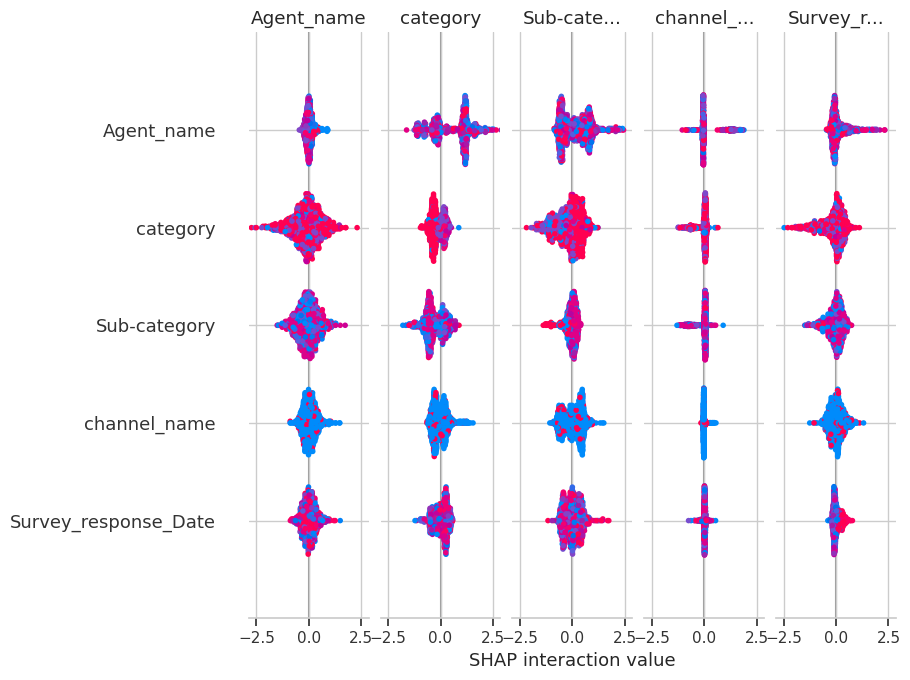

 SHAP Bar Plot - CatBoost


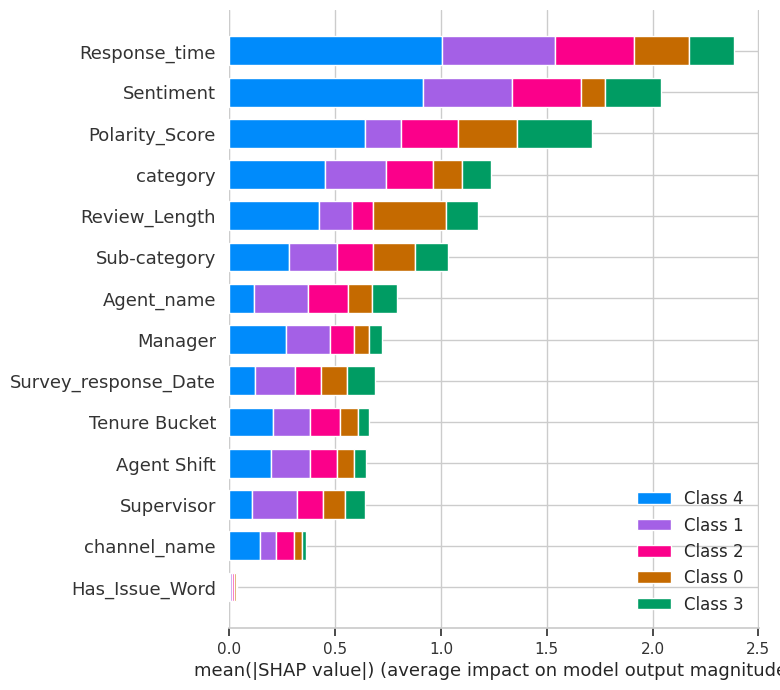

In [ ]:
#  SHAP Explainability for CatBoost (Model 4)

# !pip install shap --quiet

import shap
import numpy as np
import matplotlib.pyplot as plt

# Optional: sample small set for faster visualization
X_disp = X_test.sample(n=min(1000, len(X_test)), random_state=42) if hasattr(X_test, "sample") else X_test

# Create SHAP TreeExplainer for CatBoost
explainer = shap.TreeExplainer(cat)

# Compute SHAP values
shap_values = explainer.shap_values(X_disp)

# If multiclass (list of arrays) → take mean of absolute values
if isinstance(shap_values, list):
    shap_values_agg = np.mean(np.abs(shap_values), axis=0)
else:
    shap_values_agg = shap_values

# Beeswarm Plot – Feature impact and direction
print(" SHAP Beeswarm Plot - CatBoost")
shap.summary_plot(shap_values_agg, X_disp, show=True)

# Bar Plot – Mean |SHAP| feature importance
print(" SHAP Bar Plot - CatBoost")
shap.summary_plot(shap_values_agg, X_disp, plot_type="bar", show=True)


The CatBoost Classifier (Model 4) was used to predict Customer Satisfaction (CSAT) levels. It is a gradient boosting model that automatically handles categorical and numerical data efficiently and captures complex, non-linear relationships.

The SHAP explainability results show that CatBoost effectively identifies both behavioral and operational drivers of customer satisfaction.
Response efficiency, communication tone, and service type were found to be the key factors influencing CSAT, providing actionable insights to improve customer experience and support quality.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This Project applied data analytics and machine learning to predict customer satisfaction using service and operational data. After thorough data cleaning, transformation, and visualization, key drivers like response time, sentiment, and agent performance were identified.

Models including Logistic Regression, Random Forest, XGBoost, and CatBoost were implemented, with XGBoost achieving the best results. The project proved that data-driven insights can effectively enhance service quality, boost customer satisfaction, and support better decision-making.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***